# Importing packages

Importing required packages for work






In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import std
!pip install pingouin
import pingouin as pg
!pip install statannot
from statannot import add_stat_annotation
!pip install dython
from dython.nominal import associations
from pingouin import distance_corr

#t-test

##Independent t-test

Importing the dataset from Google Drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

Checking information about the data frame



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking information about the structure of the
data frame

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Printing first 5 rows of our observations. If we need more then 5 - use a certain number as parameter. If we need last rows - df.tail()



In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Calculating the number of observations in category. Can use it to define if we can perform t-test or we need to choose Welch modification

In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

If we need ratio - normalize as parameter

In [ ]:
df['gender'].value_counts(normalize=True)

female    0.518
male      0.482
Name: gender, dtype: float64

Plotting the distribution of gender. sns.set for adjusting the size of pic globally

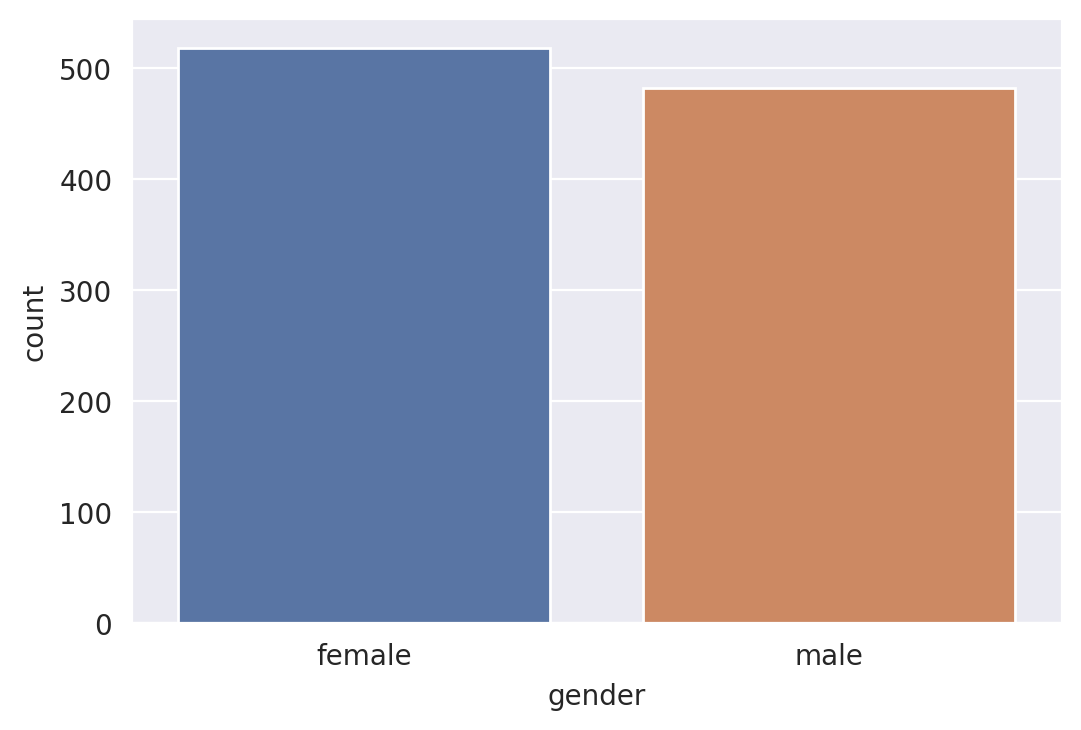

In [ ]:
sns.set({'figure.dpi':200})
sns.countplot(data=df, x='gender')

Adding another categorical variable to plot. plt.legend for positioning of legend

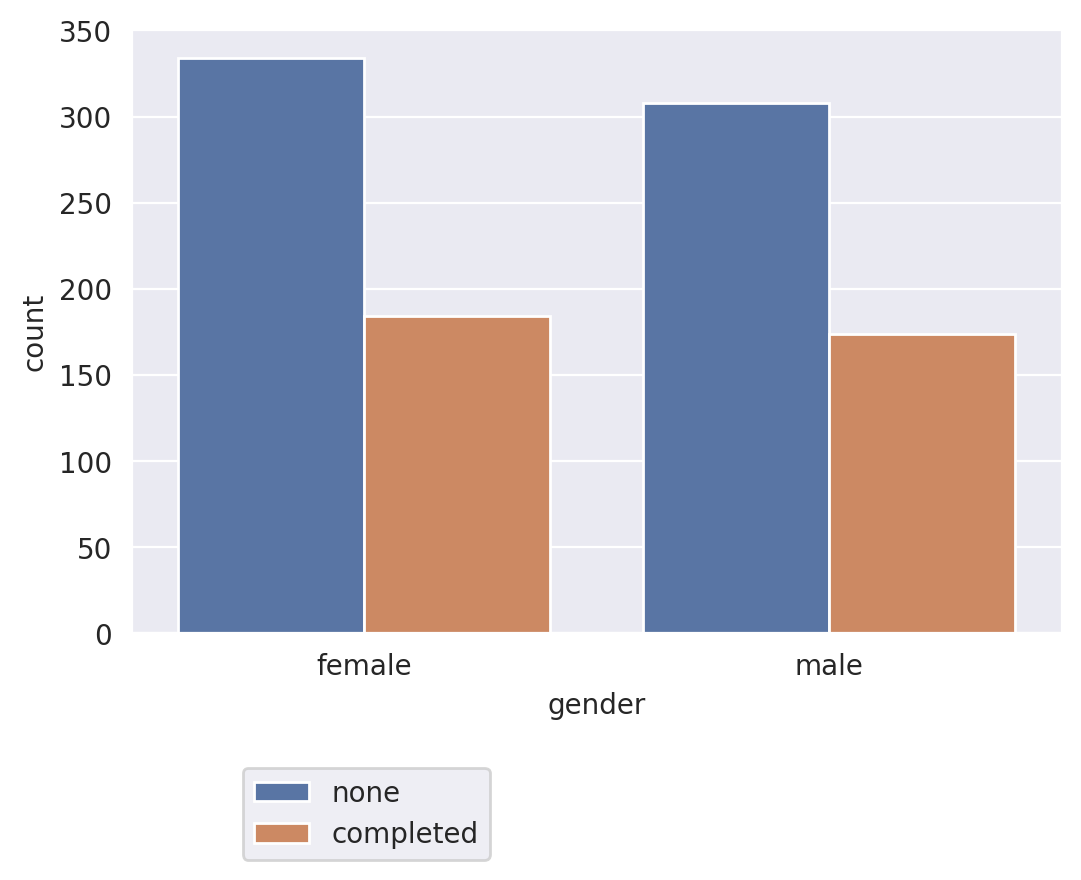

In [ ]:
sns.countplot(data=df, x='gender', hue='test preparation course')
plt.legend(bbox_to_anchor=(0.4, -0.2))

Using Q-Q plot for checking the normality

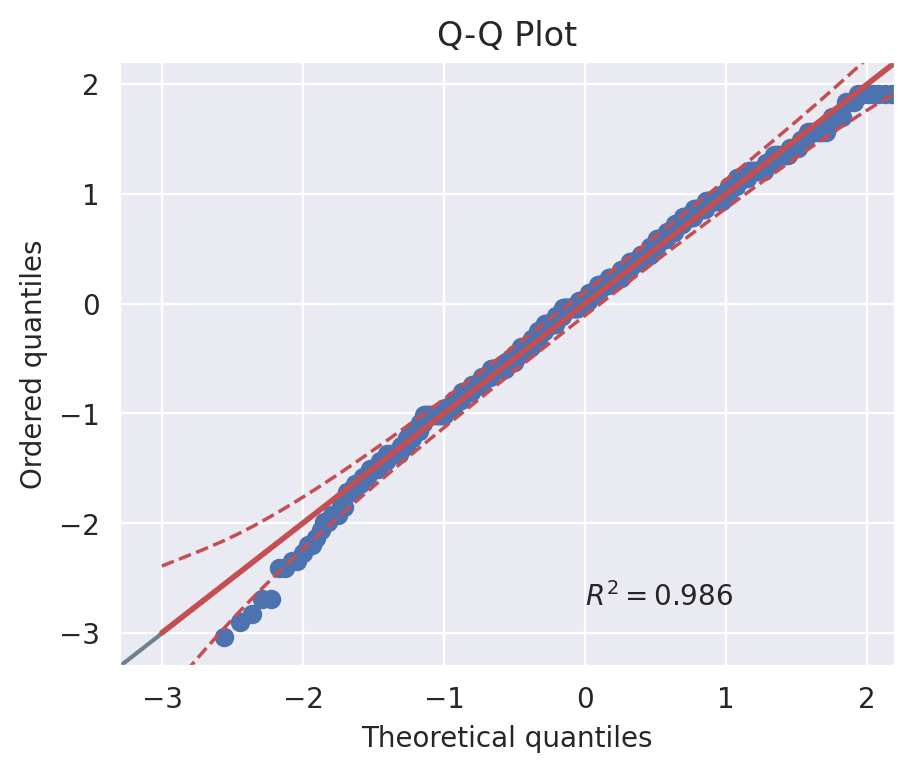

In [ ]:
female = df.query('gender == "female"')['reading score']
male = df.query('gender == "male"')['reading score']
pg.qqplot(female)

Or sns.histlot

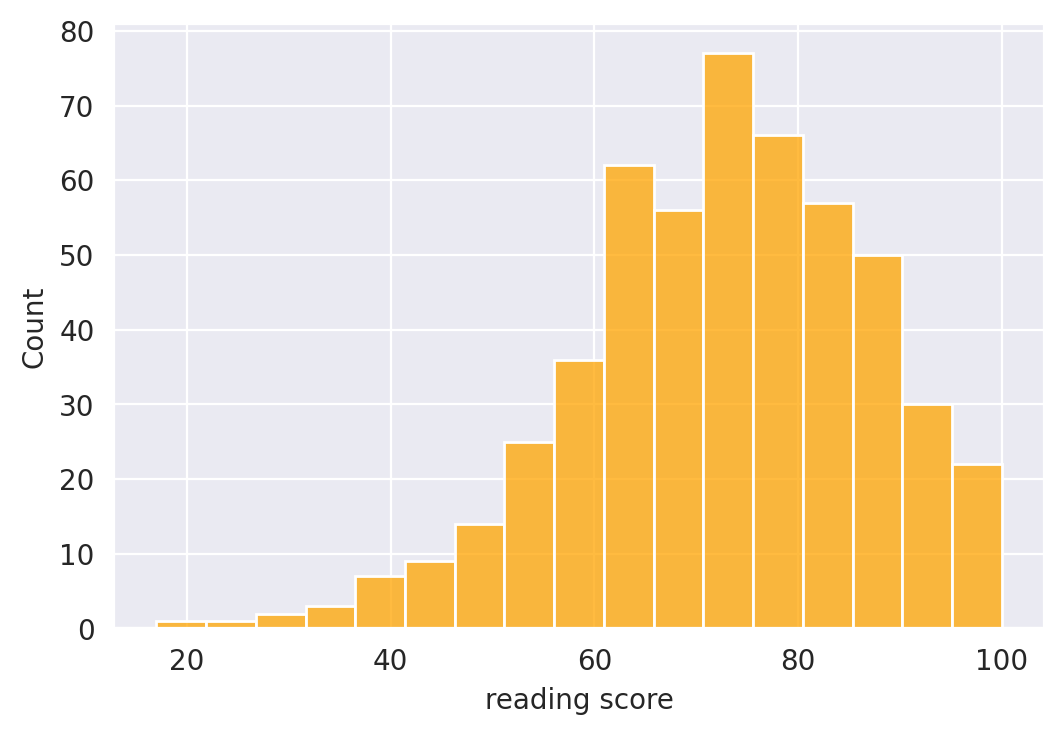

In [ ]:
sns.histplot(female, color='orange')

Before doing any researches we can define an optimal number of repeats

d - effect size - the probability that a score sampled at random from one distribution will br=e greater than a score sampled from other distribution

power - better when more than 0.8

In [ ]:
pg.power_ttest(d=0.34, n=None, power=0.80, alpha=0.05)

136.76045537698644

Calculating the means, standart devistions and SEMs

In [ ]:
df.groupby('gender').agg(['mean', 'std', 'sem'])

math score                       ... writing score                     
             mean        std       sem  ...          mean        std       sem
gender                                  ...                                   
female  63.633205  15.491453  0.680655  ...     72.467181  14.844842  0.652245
male    68.728216  14.356277  0.653911  ...     63.311203  14.113832  0.642867

[2 rows x 9 columns]

###Hometask 1



---


Comparing reading score with regard to gender


---




Visualizing our data using the bloxplot method

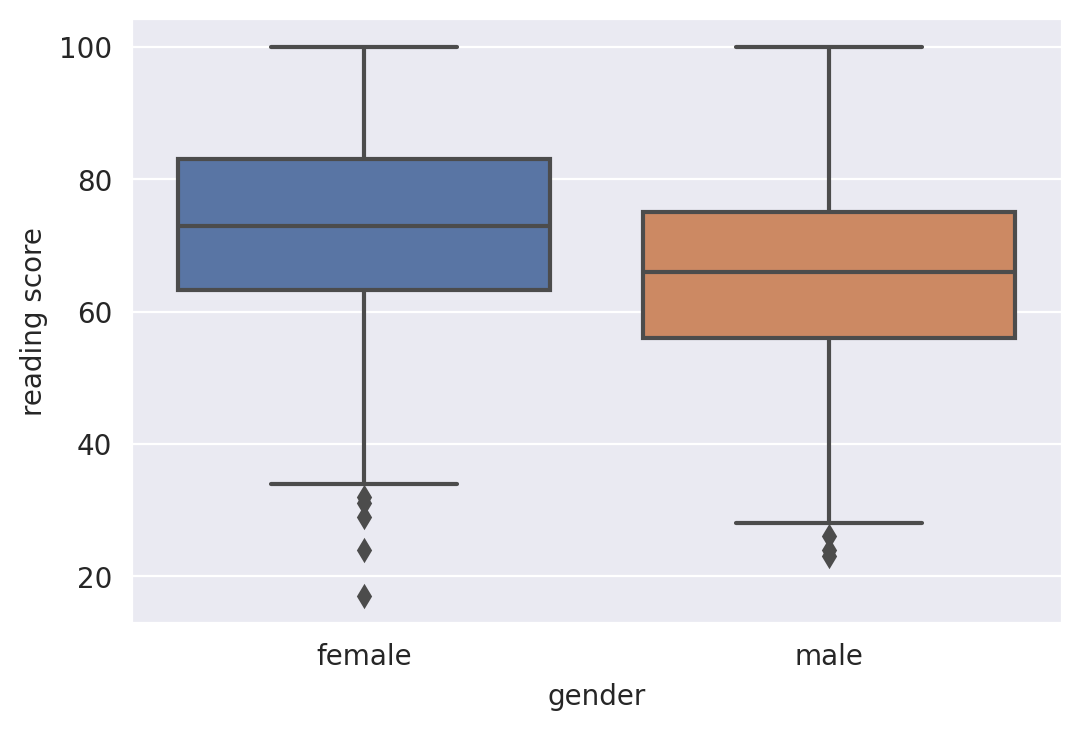

In [ ]:
sns.boxplot(data=df, x='gender', y='reading score')

Visualizing our data using the barplot method

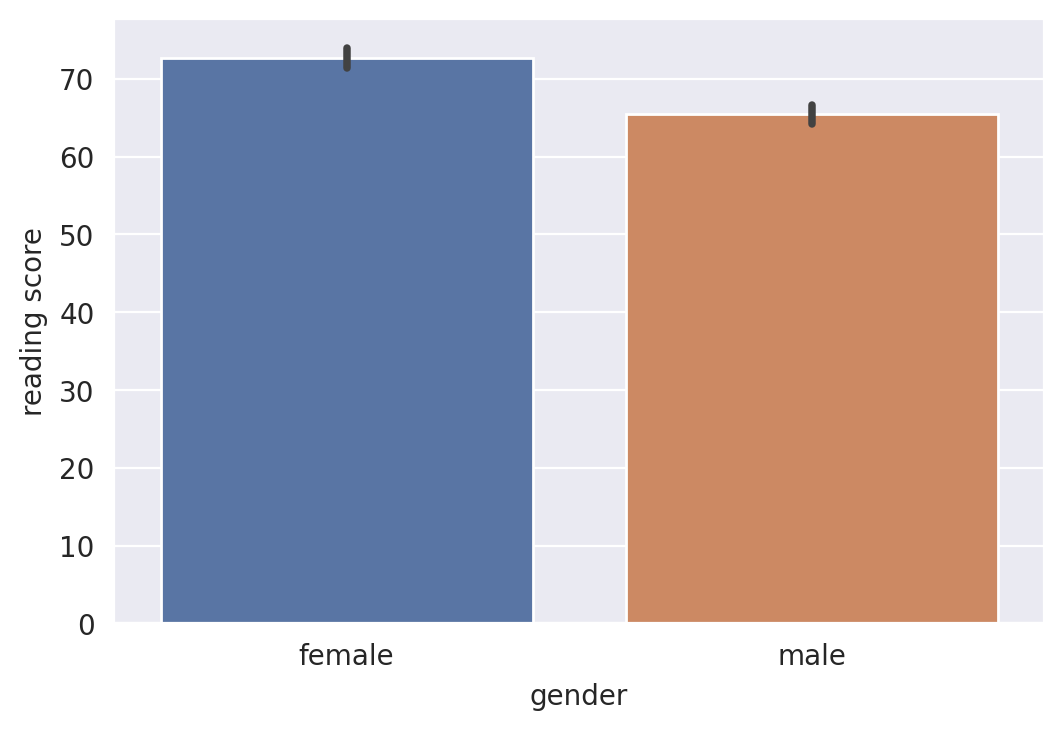

In [ ]:
sns.barplot(data=df, x='gender', y='reading score', ci=95)

Checking the normality of data using the Shapiro-Wilk method

In [ ]:
pg.normality(data=df, dv='reading score', group='gender')

,W,pval,normal
female,0.985496,0.000050,False
male,0.994624,0.089678,True


According to results variables in female group aren't normal, but it can be caused by a large amount of samples. To check it we're performing the omnibus test of normality

In [ ]:
pg.normality(data=df, dv='reading score', group='gender', method='normaltest')

,W,pval,normal
female,16.344463,0.000282,False
male,3.184875,0.203429,True


For female group the result is still false. The next step is to test equality of variance

In [ ]:
pg.homoscedasticity(data=df, dv='reading score', group='gender')

,W,pval,equal_var
levene,0.018761,0.891082,True


As we see, variances are homogenous. Despite having an abnormality of data in female group we're going to perform a t-test. Before this, we're filtering our data


In [ ]:
female = df.query('gender == "female"')['reading score']
male = df.query('gender == "male"')['reading score']

Performing a t-test

In [ ]:
pg.ttest(female, male)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.968357,996.359738,two-sided,4.376297e-15,"[5.38, 8.89]",0.503717,1.138e+12,1.0


We see a results of two-sided test. According to results, t-value is equall to 7.968357 when the number of degrees of freedom is 996.359738, P-value is 4.376297e-22. The confidence interval shows, that there is 95% chance that the true difference between means lies between 5.38 and 8.89.

Conclusion: female students had higher reading score than male students (t(996.359)=7.968, p=4.376e-15)

In [ ]:
df.groupby('gender').agg(['mean', 'std', 'sem'])

math score                       ... writing score                     
             mean        std       sem  ...          mean        std       sem
gender                                  ...                                   
female  63.633205  15.491453  0.680655  ...     72.467181  14.844842  0.652245
male    68.728216  14.356277  0.653911  ...     63.311203  14.113832  0.642867

[2 rows x 9 columns]

Better to describe results as:


Statistical analysis was performed using Python's statistical package Pingouin (https://pingouin-stats.org, ver. 0.4). Shapiro test was used to assess the normality distribution of the data as well as Q-Q plot. Levine test was used to check for homoscedasticity. To compare the means t-test (Welch) was used. Results were considered statistically significant at p < 0.05.

Results: We have found a statistically significant difference (p < 0.05) in means between female (72.61 +- 0.63) and male (65.47 +- 0.63) in reading score. t-test: 7.97 (df=996, p-value < 0.05). Even though this was a statistically significant difference the effect size was quite small (Cohen d = 0.5).

---


Comparing writing score with regard to gender


---



Visualizing our data using the bloxplot method

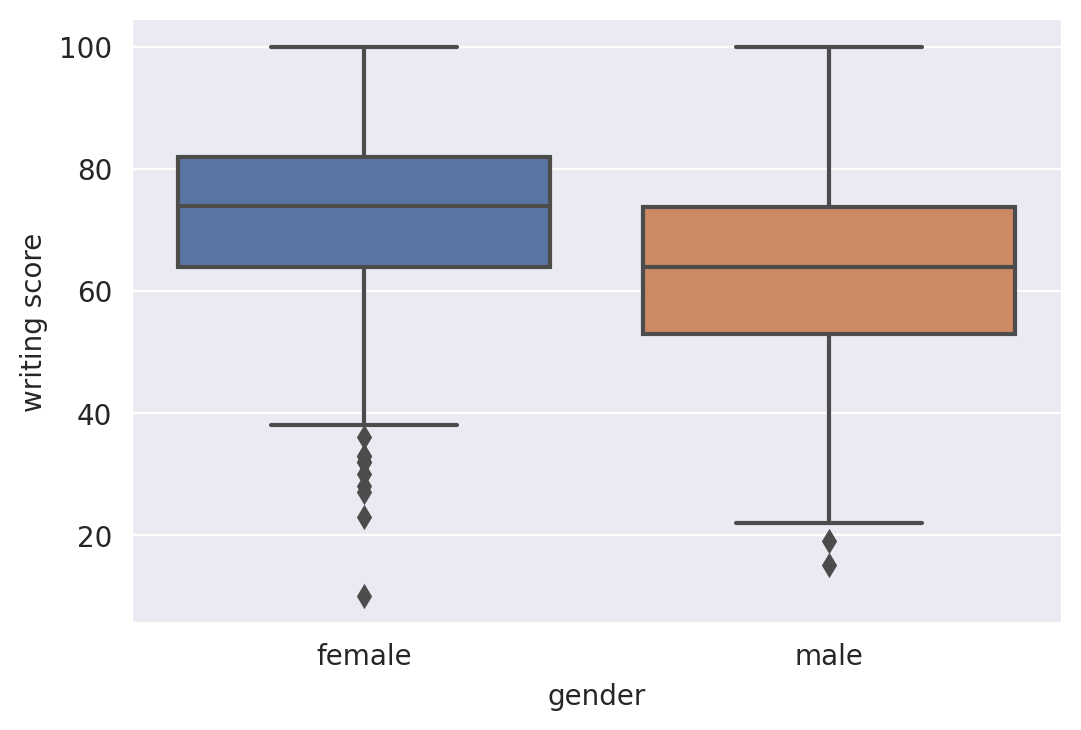

In [ ]:
sns.boxplot(data=df, x='gender', y='writing score')


Visualizing our data using the barplot method

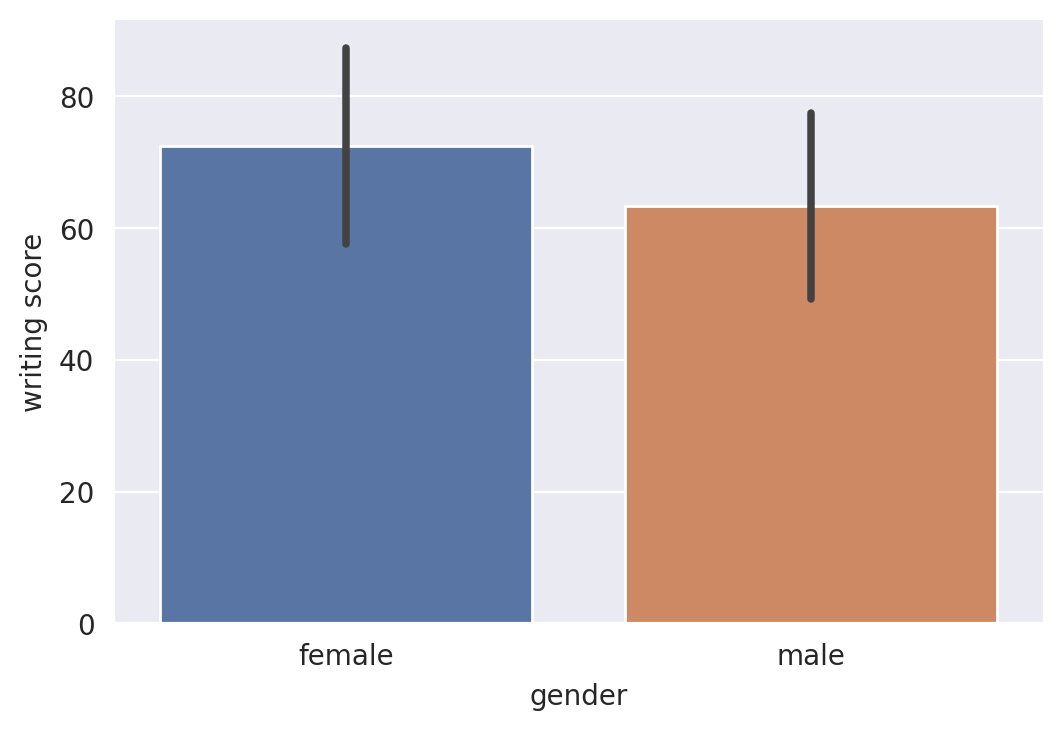

In [ ]:
sns.barplot(data=df, x='gender', y='writing score', ci='sd')

Checking the normality of data using the Shapiro-Wilk method

In [ ]:
pg.normality(data=df, dv='writing score', group='gender')

,W,pval,normal
female,0.979245,9.895068e-07,False
male,0.994809,1.040791e-01,True



According to results variables in female group aren't normal, but it can be caused by a large amount of samples. To check it we're performing the omnibus test of normality

In [ ]:
pg.normality(data=df, dv='writing score', group='gender', method='normaltest')

,W,pval,normal
female,29.642089,3.658492e-07,False
male,2.442582,2.948492e-01,True


For female group the result is still false. The next step is to test equality of variance

In [ ]:
pg.homoscedasticity(data=df, dv='writing score', group='gender')

,W,pval,equal_var
levene,0.006939,0.933627,True


As we see, variances are homogenous. Despite having an abnormality of data in female group we're going to perform a t-test. Before this, we're filtering our data

In [ ]:
female = df.query('gender == "female"')['writing score']
male = df.query('gender == "male"')['writing score']

Calculating means, STDs and SEMs

In [ ]:
df.groupby('gender').agg(['mean', 'std', 'sem'])

math score                       ... writing score                     
             mean        std       sem  ...          mean        std       sem
gender                                  ...                                   
female  63.633205  15.491453  0.680655  ...     72.467181  14.844842  0.652245
male    68.728216  14.356277  0.653911  ...     63.311203  14.113832  0.642867

[2 rows x 9 columns]

Performing a t-test

In [ ]:
pg.ttest(female, male)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.997719,997.534348,two-sided,1.711809e-22,"[7.36, 10.95]",0.631572,2.023e+19,1.0


We see a results of two-sided test. According to results, t-value is equall to 9.997 when the number of degrees of freedom is 997.534, P-value is 1.711809e-22. The confidence interval shows, that there is 95% chance that the true difference between means lies between 7.36 and 10.95.

Better:

Statistical analysis was performed using Python's statistical package Pingouin (https://pingouin-stats.org, ver. 0.4). Shapiro test was used to assess the normality distribution of the data as well as Q-Q plot. Levine test was used to check for homoscedasticity. To compare the means t-test (Welch) was used. Results were considered statistically significant at p < 0.05.

Results: We have found a statistically significant difference (p < 0.05) in means between female (72.47 +- 0.65) and male (63.31 +- 0.64) in writing score. t-test: 9.99 (df=998, p-value < 0.05). Even though this was a statistically significant difference the effect size was quite small (Cohen d = 0.63).

## Nonparametric Mann-Whitney U-test

CLES - common-language effect size - probability that a score sampled ar random from one distribution will be greater than a score sampled from some other distribution

In [ ]:
pg.mwu(female, male)

,U-val,alternative,p-val,RBC,CLES
MWU,169956.5,two-sided,4.669173e-23,-0.361416,0.680708


## Dependent t-test (paired)

Compairison of one object in different time (after certain things)

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Paired data.xlsx')
df

,Before,After
0,110,116
1,99,108
2,117,125
3,111,110
4,115,119
5,125,125
6,114,119
7,130,127
8,120,130


In [ ]:
pg.ttest(df['Before'], df['After'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.7353,8,two-sided,0.025635,"[-7.78, -0.66]",0.507174,3.039,0.268893


## Nonparametric Wilcoxon signed-rank test

In [ ]:
pg.wilcoxon(df['Before'], df['After'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,3.0,two-sided,0.042315,-0.833333,0.37037


# ANOVA

## One-way ANOVA


Analysis of variance - variability ratio

More than 2 groups, but also can be used instead of t-test

Нульова гіпотеза - всі вибірки походять з однієї генеральної сукупності

Альтернативна - групи відрізняються між собою

2 types of variances: between and within

Between - міжгрупова - на скільки середні відрізнялися від популяційного середнього - середнє всіх вибірок

Within - внутрішньогрупова - дисперсія в групі

Total = Between + Within

F = Among/Around - статистичний критерій Фішера - має бути більшим за одиницю за наявності різниці

Why t-test cannot be used when we have more than 2 groups? - probability of error is getting bigger with every comparison - 5%

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance (1).csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


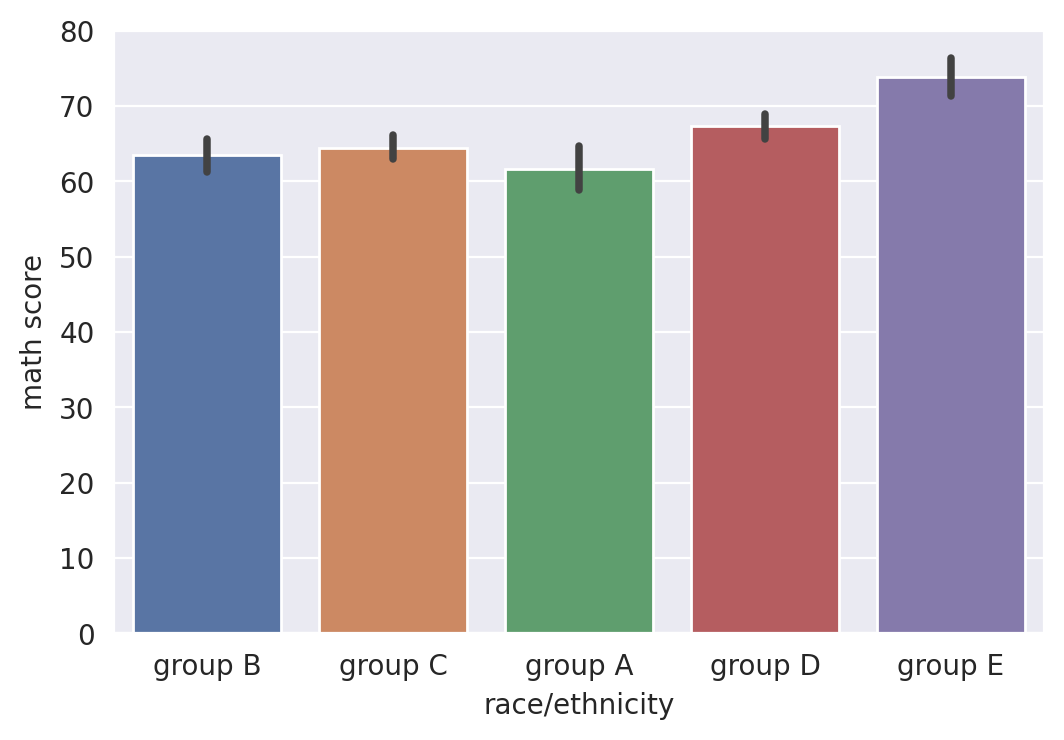

In [ ]:
sns.barplot(data=df, x='race/ethnicity', y='math score')

Performing ANOVA

In [ ]:
pg.anova(data=df, dv='math score', between='race/ethnicity')

,Source,ddof1,ddof2,F,p-unc,np2
0,race/ethnicity,4,995,14.593885,1.373219e-11,0.055418


In result we kave statistically valuable difference between groups. To define between which groups we have difference we use pairwise Tukey method. This method is better to use in balanced ANOVA

Поправки на множинне порівняння - multiple comparison test - попарне порівняння груп між собою + корекція на можливість допустити помилку в 5%

T - t-тест модернізований

In [ ]:
pg.pairwise_tukey(data=df, dv='math score', between='race/ethnicity')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,group A,group B,61.629213,63.452632,-1.823418,1.896745,-0.961341,0.859674,-0.123149
1,group A,group C,61.629213,64.463950,-2.834736,1.770184,-1.601380,0.496613,-0.191615
2,group A,group D,61.629213,67.362595,-5.733382,1.811701,-3.164641,0.013824,-0.387434
3,group A,group E,61.629213,73.821429,-12.192215,2.001876,-6.090393,0.001000,-0.822934
4,group B,group C,63.452632,64.463950,-1.011318,1.353210,-0.747347,0.900000,-0.068386
5,group B,group D,63.452632,67.362595,-3.909964,1.407085,-2.778769,0.044071,-0.264344
6,group B,group E,63.452632,73.821429,-10.368797,1.644730,-6.304253,0.001000,-0.700575
7,group C,group D,64.463950,67.362595,-2.898646,1.231177,-2.354369,0.128688,-0.196044
8,group C,group E,64.463950,73.821429,-9.357479,1.497013,-6.250767,0.001000,-0.632654
9,group D,group E,67.362595,73.821429,-6.458833,1.545884,-4.178084,0.001000,-0.436576


Checking the number of values

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

As we can see, there are different number of observation in each group, so we have unbalanced ANOVA. For unbalanced ANOVA better to use Games-Howell

hedges - effect size?

In [ ]:
pg.pairwise_gameshowell(data=df, dv='math score', between='race/ethnicity')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,group A,group B,61.629213,63.452632,-1.823418,1.905033,-0.957158,182.391120,0.861668,-0.122613
1,group A,group C,61.629213,64.463950,-2.834736,1.749687,-1.620139,143.470524,0.487328,-0.193860
2,group A,group D,61.629213,67.362595,-5.733382,1.758838,-3.259755,145.377353,0.011935,-0.399078
3,group A,group E,61.629213,73.821429,-12.192215,2.023247,-6.026064,196.689001,0.001000,-0.814242
4,group B,group C,63.452632,64.463950,-1.011318,1.396721,-0.724066,384.636068,0.900000,-0.066255
5,group B,group D,63.452632,67.362595,-3.909964,1.408168,-2.776631,378.193277,0.045400,-0.264141
6,group B,group E,63.452632,73.821429,-10.368797,1.727123,-6.003507,298.944436,0.001000,-0.667154
7,group C,group D,64.463950,67.362595,-2.898646,1.189618,-2.436620,570.546280,0.107214,-0.202893
8,group C,group E,64.463950,73.821429,-9.357479,1.554094,-6.021181,254.969419,0.001000,-0.609418
9,group D,group E,67.362595,73.821429,-6.458833,1.564390,-4.128660,256.166789,0.001000,-0.431412


Adding annotations to plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

group D v.s. group E: t-test independent samples with Bonferroni correction, P_val=6.956e-05 stat=-4.282e+00
group C v.s. group E: t-test independent samples with Bonferroni correction, P_val=5.782e-09 stat=-6.128e+00
group B v.s. group E: t-test independent samples with Bonferroni correction, P_val=1.502e-08 stat=-6.007e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb4db80c250>,
  <statannot.StatResult.StatResult at 0x7fb4db76e2d0>])

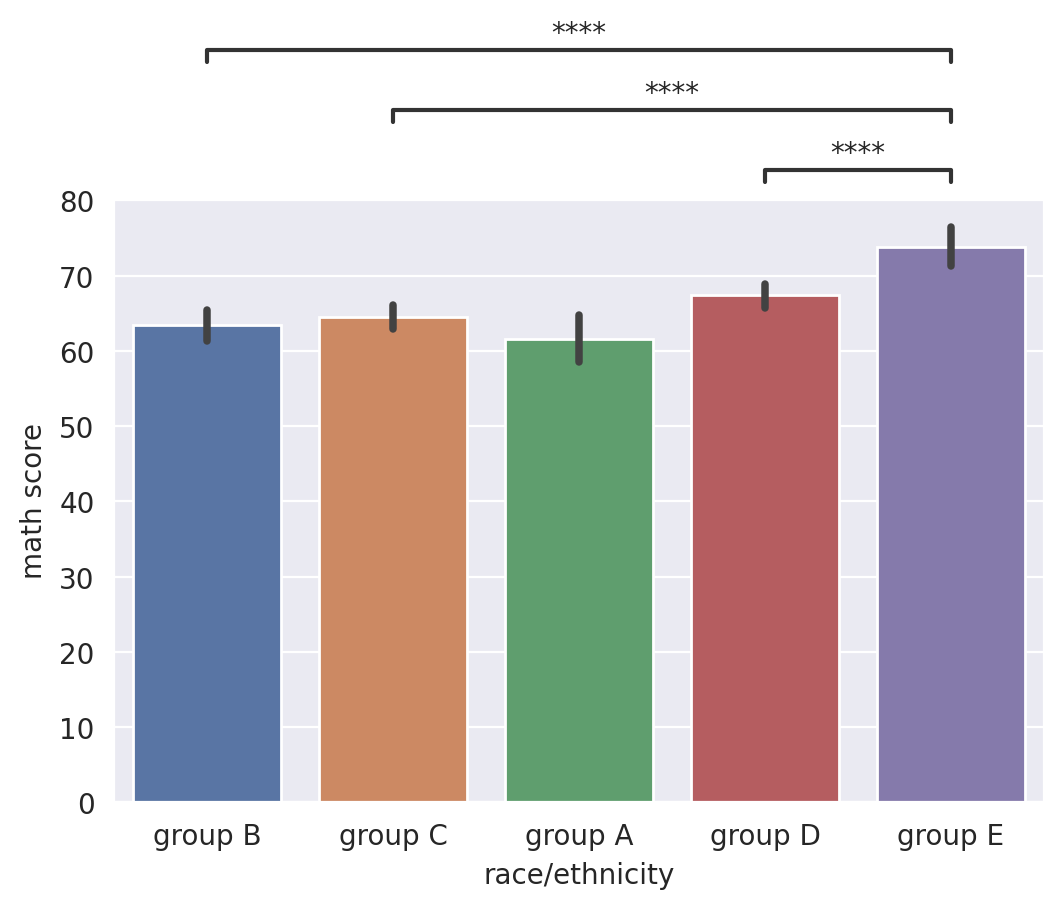

In [ ]:
ax = sns.barplot(data=df, x='race/ethnicity', y='math score')
test_results = add_stat_annotation(ax, data=df, x='race/ethnicity', y='math score',
                                  test='t-test_ind', text_format='star', box_pairs=[('group D', 'group E'), ('group C', 'group E'), ('group B', 'group E')],
                                   loc='outside')
test_results

Statistical analysis was performed using Python's statistical package Pingouin (https://pingouin-stats.org, ver. 0.4). One-way ANOVA (Analysis of Variance) was used to compare the differences between the group means. Normality of data was checked using Shapiro (Omnibus) test. Homoscedasticity was checked using Levine test. Games-Howell test was used for multiple comparisons.Results were considered statistically significant at p < 0.05.

Results:  Using multiple comparison correction we observed statictically significal differences between groups: B (63.45 +- 1.72 ) and E (73.82 +- 1.56); C (64.46 +- 1.55) and E (73.82 +- 1.56); D (67.36 +- 1.56) and E (73.82 +- 1.56). F(df=4) = 14.59. p < 0.05

Effect size? A&E - 0.81, others - less

## Welch ANOVA

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Used when group is unbalanced

In [ ]:
pg.welch_anova(data=df, dv='math score', between='race/ethnicity')

,Source,ddof1,ddof2,F,p-unc,np2
0,race/ethnicity,4,365.539727,13.590362,2.437776e-10,0.055418


Де різниця полягає? - додатково тести на множинні порівняння

## Nonparametric ANOVA Kruskal-Wallis test

Відсутня нормальність розподілу та гомогенність

Статистична потужність менша!

Ну і тести на множинні порівняння

In [ ]:
pg.kruskal(data=df, dv='math score', between='race/ethnicity')

,Source,ddof1,H,p-unc
Kruskal,race/ethnicity,4,57.07933,1.190657e-11


##Two-way ANOVA

Using when we have 2 categorical variables in analysis

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


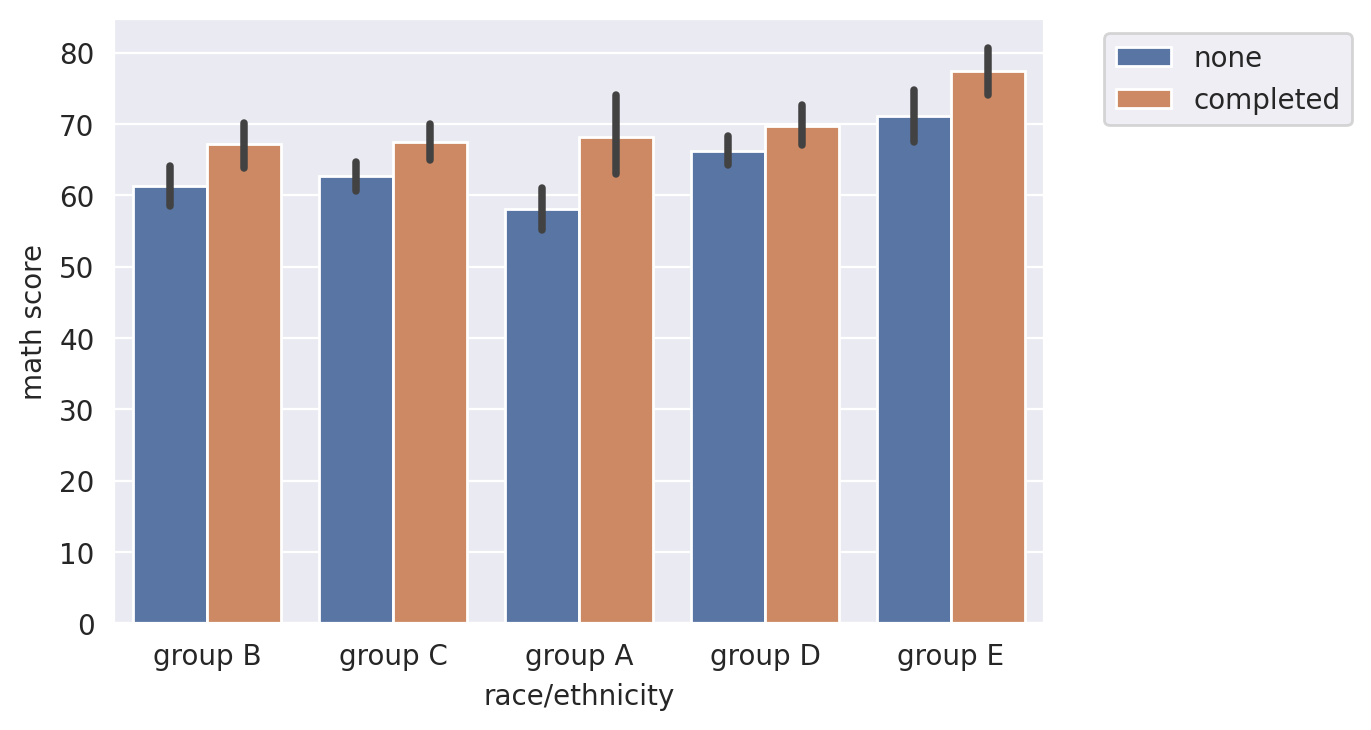

In [ ]:
sns.barplot(data=df, x='race/ethnicity', y='math score', hue='test preparation course')
plt.legend(bbox_to_anchor=(1.05, 1))

Checking if there a statistical difference between students who completed the preparation course and not

Різниця між групою 1, групою 2 та чи є взаємодія

In [ ]:
pg.anova(data=df, dv='math score', between=['race/ethnicity', 'test preparation course'])

,Source,SS,DF,MS,F,p-unc,np2
0,race/ethnicity,12098.961751,4.0,3024.740438,14.285553,2.420806e-11,0.054570
1,test preparation course,6623.305284,1.0,6623.305284,31.281223,2.887506e-08,0.030629
2,race/ethnicity * test preparation course,720.080145,4.0,180.020036,0.850217,4.934836e-01,0.003423
3,Residual,209616.876872,990.0,211.734219,NaN,NaN,NaN


Бачимо вплив категоріальних змінних, але вони не взаємодіють

Multiple comparison tests! - кількість факторів більше ніж 2



##Repeated measures ANOVA

Типу тесту Стьюдента з повторюваними вимірами, але більше вимірювань

In [ ]:
rm_df = pg.read_dataset('rm_anova_wide')
rm_df

,Before,1 week,2 week,3 week
0,4.3,5.3,4.8,6.3
1,3.9,2.3,5.6,4.3
2,4.5,2.6,4.1,NaN
3,5.1,4.2,6.0,6.3
4,3.8,3.6,4.8,6.8
5,3.8,5.4,5.1,6.3
6,5.1,3.7,NaN,NaN
7,4.5,3.0,7.7,5.8
8,3.7,7.1,5.5,4.8
9,4.4,4.7,4.2,5.5


In [ ]:
pg.rm_anova(rm_df)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,3,24,5.200652,0.006557,0.393969,0.694329


Для візуалізації треба шось зробити з цими данними...

Wide формат - кожен стовпчик вимірювання одного й того самого показника

Long формат - змінити структури датафрейму - з 4 стовпчиків перейти в 2 стовпчики аааааа типу біфор ван вік 2 вік в один стовпчик, а значення глюкози в інший ...

Для seaborn складний вайд формат

Створення ідентифікатору для кожного спостереження

In [ ]:
rm_df['id'] = rm_df.index
rm_df

,Before,1 week,2 week,3 week,id
0,4.3,5.3,4.8,6.3,0
1,3.9,2.3,5.6,4.3,1
2,4.5,2.6,4.1,NaN,2
3,5.1,4.2,6.0,6.3,3
4,3.8,3.6,4.8,6.8,4
5,3.8,5.4,5.1,6.3,5
6,5.1,3.7,NaN,NaN,6
7,4.5,3.0,7.7,5.8,7
8,3.7,7.1,5.5,4.8,8
9,4.4,4.7,4.2,5.5,9


Лонг формат!!!

In [ ]:
rm_df = rm_df.melt(id_vars='id', value_vars=['Before', '1 week', '2 week', '3 week'], var_name='Time', value_name='glucose')

In [ ]:
rm_df

,id,Time,glucose
0,0,Before,4.3
1,1,Before,3.9
2,2,Before,4.5
3,3,Before,5.1
4,4,Before,3.8
5,5,Before,3.8
6,6,Before,5.1
7,7,Before,4.5
8,8,Before,3.7
9,9,Before,4.4


CI = 68 - стандартна похибка

Середні значення

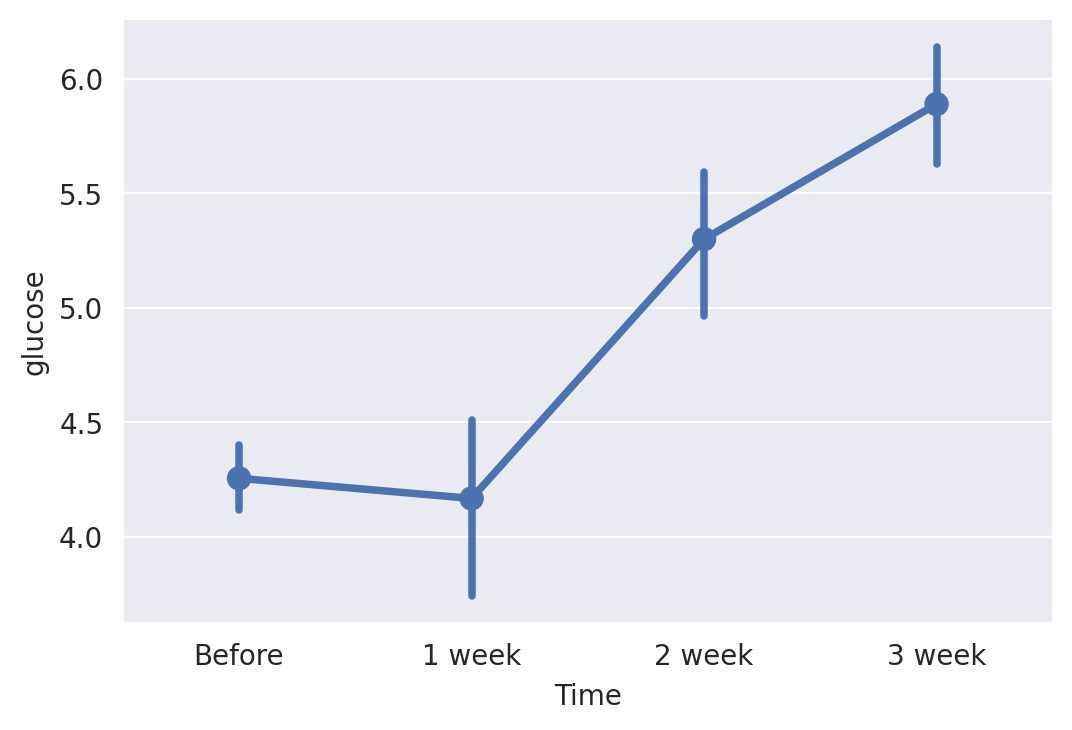

In [ ]:
sns.pointplot(data=rm_df, x='Time', y='glucose', ci=68)

Відновлення таблиці

In [ ]:
rm_long = rm_df.pivot_table(index='id', columns='Time', values='glucose')
rm_long

Time,1 week,2 week,3 week,Before
id,,,,
0,5.3,4.8,6.3,4.3
1,2.3,5.6,4.3,3.9
2,2.6,4.1,NaN,4.5
3,4.2,6.0,6.3,5.1
4,3.6,4.8,6.8,3.8
5,5.4,5.1,6.3,3.8
6,3.7,NaN,NaN,5.1
7,3.0,7.7,5.8,4.5
8,7.1,5.5,4.8,3.7


Ну і multiple comparison tests...

##Mixed ANOVA

Змішування часових проміжків та категоріальних змін

In [ ]:
mixed_df = pd.read_csv('/content/drive/MyDrive/mixed_anova.csv')
mixed_df

,Unnamed: 0,Scores,Time,Group,Subject
0,0,5.971435,August,Control,0
1,1,4.309024,August,Control,1
2,2,6.932707,August,Control,2
3,3,5.187348,August,Control,3
4,4,4.779411,August,Control,4
...,...,...,...,...,...
175,175,6.176981,June,Meditation,55
176,176,8.523692,June,Meditation,56
177,177,6.522273,June,Meditation,57
178,178,4.990568,June,Meditation,58


dodge = True - щоб не накладалися похибки

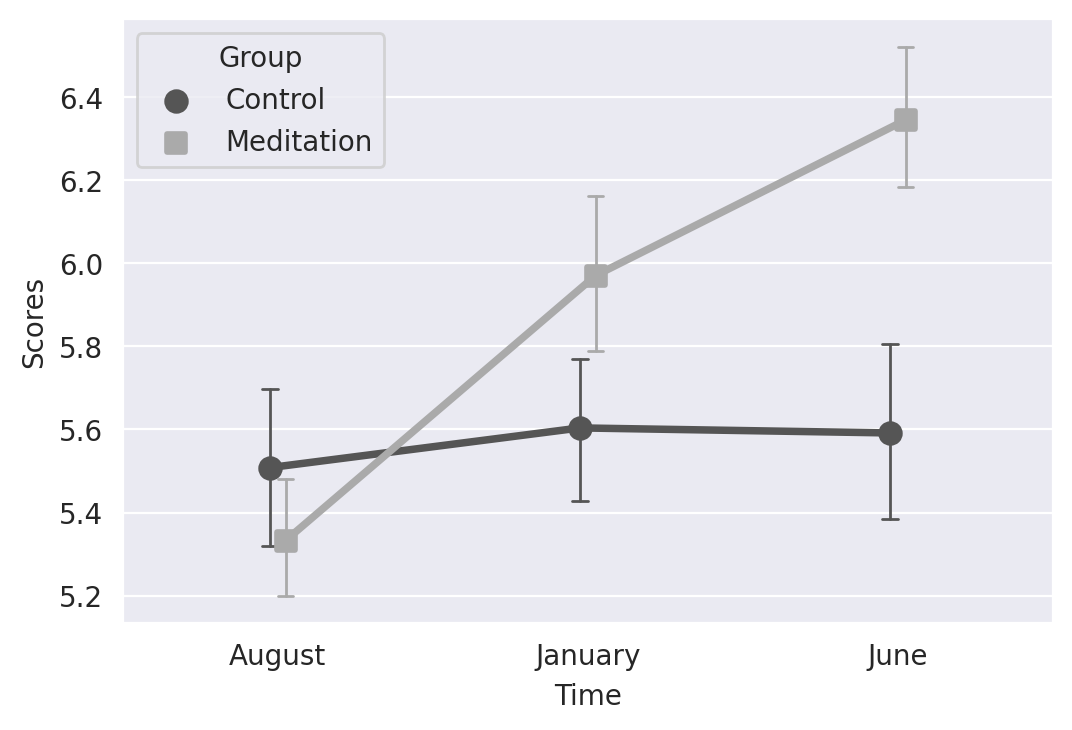

In [ ]:
sns.pointplot(data=mixed_df, x='Time', y='Scores', hue='Group',
              ci=68, markers=['o', 's'], palette='gist_gray', capsize=0.05, errwidth=1, dodge=True)

In [ ]:
mixed_df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std', 'sem'])

mean       std       sem
Time    Group                                   
August  Control     5.508184  1.029795  0.188014
        Meditation  5.332482  0.813022  0.148437
January Control     5.603746  0.900437  0.164397
        Meditation  5.970728  1.074590  0.196192
June    Control     5.591624  1.179973  0.215433
        Meditation  6.345328  0.933034  0.170348

In [ ]:
pg.mixed_anova(data=mixed_df, dv='Scores', within='Time', between='Group', subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,4.464979,1,58,4.464979,4.131122,0.046689,0.066490,NaN
1,Time,9.358520,2,116,4.679260,4.940789,0.008725,0.078499,0.997828
2,Interaction,6.539283,2,116,3.269641,3.452385,0.034960,0.056180,NaN


In [ ]:
pg.pairwise_ttests(data=mixed_df, dv='Scores', within='Time', between='Group', subject='Subject', padjust='bonf')

,Contrast,Time,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,-,August,January,True,True,-2.002391,59.0,two-sided,0.049846,0.149537,bonf,0.908,-0.378614
1,Time,-,August,June,True,True,-2.985041,59.0,two-sided,0.004122,0.012366,bonf,7.594,-0.530177
2,Time,-,January,June,True,True,-1.023620,59.0,two-sided,0.310194,0.930581,bonf,0.232,-0.169520
3,Group,-,Control,Meditation,False,True,-2.032516,58.0,two-sided,0.046689,NaN,NaN,1.447,-0.517978
4,Time * Group,August,Control,Meditation,False,True,0.733477,58.0,two-sided,0.466222,1.000000,bonf,0.329,0.186923
5,Time * Group,January,Control,Meditation,False,True,-1.433725,58.0,two-sided,0.157020,0.471060,bonf,0.619,-0.365379
6,Time * Group,June,Control,Meditation,False,True,-2.744291,58.0,two-sided,0.008058,0.024173,bonf,5.593,-0.699371


  ### Hometask 2

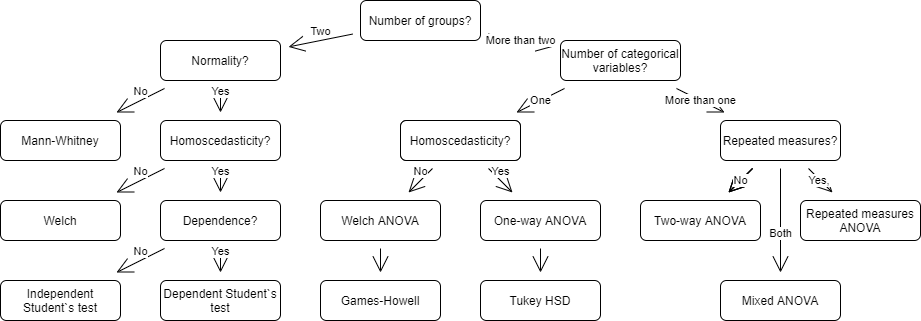

### Hometask 3

Importing data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/stat data/AVOVA data.xlsx')
df.head()

,Unnamed: 0,Sex,Age,Group_age,DM_years,HbA1c,GFR,Creatinine,Urea,CECs_1,CECs_2,CECs_3,CECs,DM_type,Group,Group_HbA1c,Group_GFR,Group_DM_years
0,1,male,76,Third,29,9.0,42.0,139,7.1,500,1600,800,2900,DM_2,case,Third,Third_a,more_than_15
1,2,female,67,Third,16,7.7,66.0,80,5.7,1400,2300,700,4400,DM_2,case,Second,Second,more_than_15
2,3,female,74,Third,45,8.5,58.0,85,6.5,1700,1900,700,4300,DM_2,case,Third,Third_a,more_than_15
3,4,male,42,First,3,9.0,111.0,70,3.4,1500,1900,900,4300,DM_1,case,Third,First,less_than_5
4,5,female,77,Third,8,8.4,55.0,88,9.5,900,1900,900,3700,DM_2,case,Third,Third_a,from_6_to_10




---


Creatinine


---




Checking normality of our data using Shapiro-Wilk method. If the data ditribution isn`t normal - additionally using omnibustest of normality

In [ ]:
pg.normality(data=df, dv='Creatinine', group='DM_type')

,W,pval,normal
DM_2,0.919606,0.000015,False
DM_1,0.963728,0.364839,True


In [ ]:
pg.normality(data=df, dv='Creatinine', group='DM_type', method='normaltest')

,W,pval,normal
DM_2,27.852108,8.953474e-07,False
DM_1,1.964270,3.745107e-01,True


In [ ]:
pg.normality(data=df, dv='Creatinine', group='Sex')

,W,pval,normal
male,0.904906,0.000048,False
female,0.942875,0.008676,False


In [ ]:
pg.normality(data=df, dv='Creatinine', group='Sex', method='normaltest')

,W,pval,normal
male,24.804996,0.000004,False
female,8.759642,0.012528,False


As we can see, our data mostly haven`t normal distribution. Checking if the groups are homogenous

In [ ]:
pg.homoscedasticity(data=df, dv='Creatinine', group='DM_type')

,W,pval,equal_var
levene,1.392916,0.240102,True


In [ ]:
pg.homoscedasticity(data=df, dv='Creatinine', group='Sex')

,W,pval,equal_var
levene,0.618273,0.433143,True


There are homoscedasticy in all groups so, despite of not having normality, we can use two-way ANOVA

Calculating means, STDs and SEMs

In [ ]:
df.groupby(['DM_type', 'Sex'])['Creatinine'].agg(['mean', 'std', 'sem'])

mean        std       sem
DM_type Sex                                   
DM_1    female  74.500000  16.239682  4.687992
        male    80.263158  14.906531  3.419793
DM_2    female  82.456522  18.366281  2.707960
        male    93.603774  23.557083  3.235814

Performing two-way ANOVA to analyze the effect of Sex and DM_type on level of Creatinine

In [ ]:
pg.anova(data=df, dv='Creatinine', between=['Sex', 'DM_type'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,3140.199392,1.0,3140.199392,7.767769,0.006142,0.058069
1,DM_type,2927.463625,1.0,2927.463625,7.241534,0.008091,0.054349
2,Sex * DM_type,164.173669,1.0,164.173669,0.406109,0.525107,0.003213
3,Residual,50936.776499,126.0,404.260131,NaN,NaN,NaN


Visualizing our data using barplot method

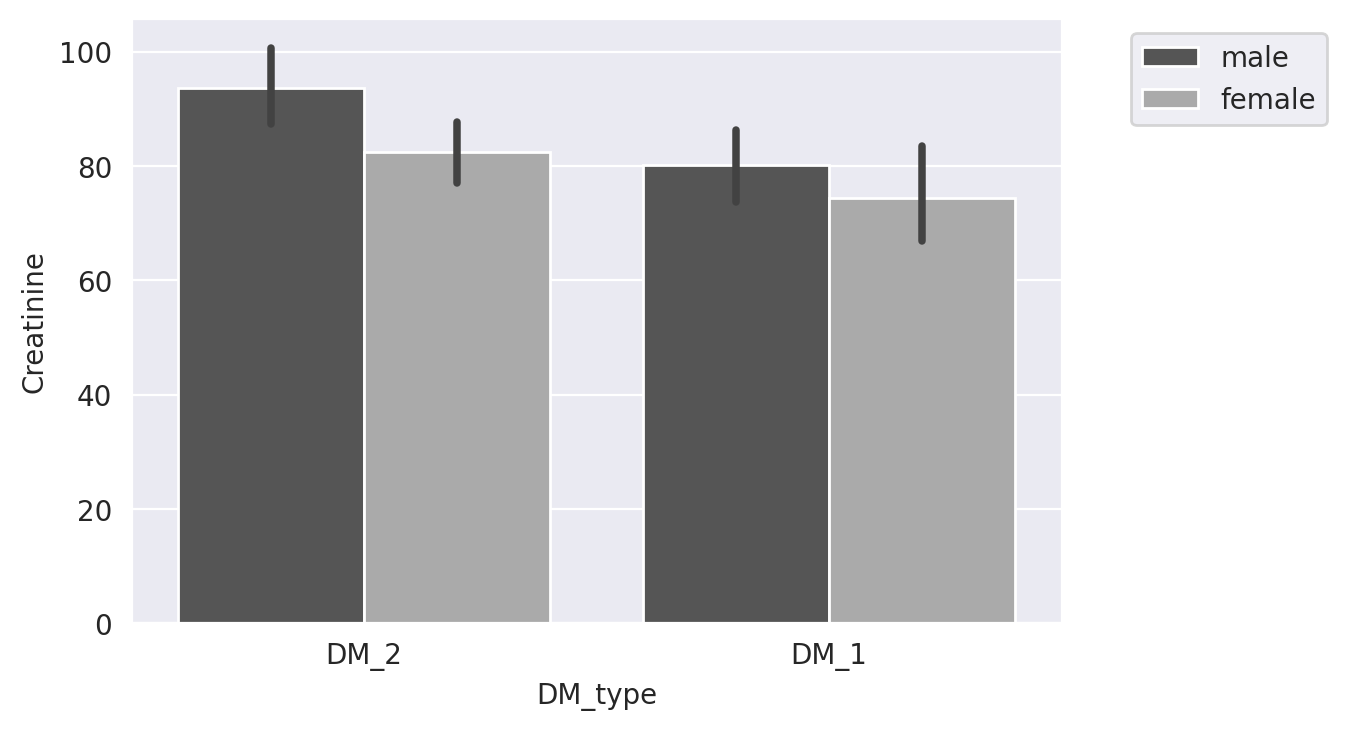

In [ ]:
sns.set({'figure.dpi':200})
sns.barplot(data=df, x='DM_type', y='Creatinine', hue='Sex', palette='gist_gray')
plt.legend(bbox_to_anchor=(1.3, 1))

Statistical analysis was performed using Python's statistical package Pingouin (https://pingouin-stats.org, ver. 0.4). Shapiro test was used to assess the normality distribution of the data as well as omnibus test. Levine test was used to check for homoscedasticity. To compare the variances two-way ANOVA was used. Results were considered statistically significant at p < 0.05.

Results: We haven`t found a statistically significant interaction (p < 0.05) in effects between sex and diabetes mellitus type  (F(1,126) = 0.406, p < 0.05). Simple main effects analysis showed that sex did gave a statistically significant effect on creatinine level (F = 7.767, p < 0.05). Simple main effect analysis showed that diabetes mellitus type did gave a statistically significant effect on creatinine level (F = 7.241, p < 0.05).



---


GFR


---




Checking normality of our data in different groups


In [ ]:
pg.normality(data=df, dv='GFR', group='DM_type')

,W,pval,normal
DM_2,0.985138,0.331739,True
DM_1,0.977746,0.747504,True


In [ ]:
pg.normality(data=df, dv='GFR', group='Sex')

,W,pval,normal
male,0.988886,0.781464,True
female,0.967760,0.125361,True


We have normal distribution of variances in both groups. Checking homoschedacity


In [ ]:
pg.homoscedasticity(data=df, dv='GFR', group='DM_type')

,W,pval,equal_var
levene,0.003916,0.950202,True


In [ ]:
pg.homoscedasticity(data=df, dv='GFR', group='Sex')

,W,pval,equal_var
levene,0.368561,0.544865,True


There are homoscedasticy in all groups so we can use two-way ANOVA

Calculating means, STDs and SEMs

In [ ]:
df.groupby(['DM_type', 'Sex'])['GFR'].agg(['mean', 'std', 'sem'])

mean        std       sem
DM_type Sex                                    
DM_1    female   92.555833  24.052926  6.943482
        male    101.401579  15.390083  3.530727
DM_2    female   69.501304  17.922558  2.642537
        male     78.345283  18.068563  2.481908

Performing two-way ANOVA

In [ ]:
pg.anova(data=df, dv='GFR', between=['Sex', 'DM_type'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,2501.662373,1.0,2501.662373,7.494501e+00,7.084643e-03,5.614089e-02
1,DM_type,12493.437099,1.0,12493.437099,3.742794e+01,1.106576e-08,2.290180e-01
2,Sex * DM_type,0.000018,1.0,0.000018,5.297090e-08,9.998167e-01,4.204039e-10
3,Residual,42058.767587,126.0,333.799743,NaN,NaN,NaN


Visualizing our data using barplot method

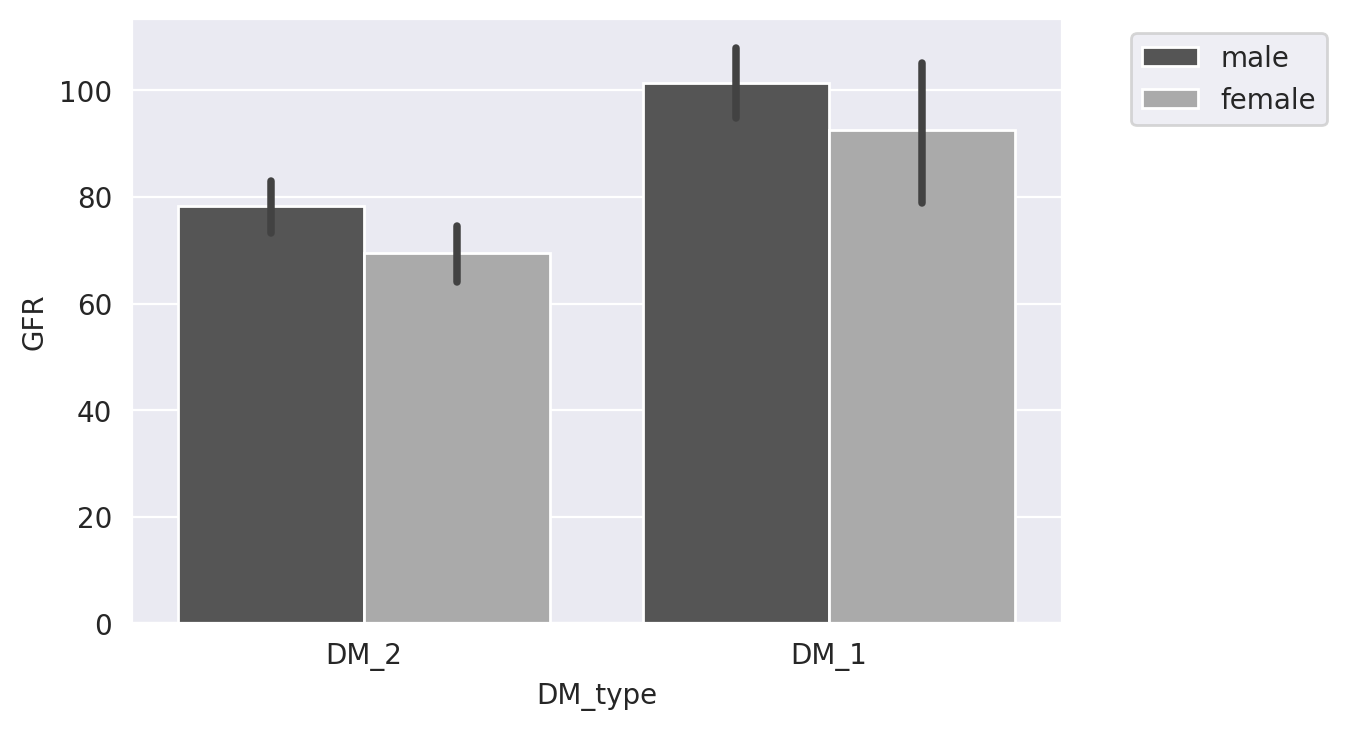

In [ ]:
sns.barplot(data=df, x='DM_type', y='GFR', hue='Sex', palette='gist_gray')
plt.legend(bbox_to_anchor=(1.3, 1))

Statistical analysis was performed using Python's statistical package Pingouin (https://pingouin-stats.org, ver. 0.4). Shapiro test was used to assess the normality distribution of the data as well as omnibus test. Levine test was used to check for homoscedasticity. To compare the variances two-way ANOVA was used. Results were considered statistically significant at p < 0.05.

Results: We have found a statistically significant interaction (p < 0.05) in effects between sex and diabetes mellitus type  (F(1,126) = 5.297, p < 0.05). Simple main effects analysis showed that sex did gave a statistically significant effect on GFP level (F = 7.494, p < 0.05). Simple main effect analysis showed that diabetes mellitus type did gave a statistically significant effect on GFP level (F = 7.084, p < 0.05).

#Bootstrap


Sampling with replacement

Створення дуже схожих виборок, що мають такий же розмір як і початкова

Можуть мати елементи, що повторюються - with replacement, без заміни - відсутність унікальності виборок

Може замінити практично будь-який статистичних методів - як?

Don`t have special requirements: normality, sample size, homoscedasticity

Central limit theorem

Law of big numbers

Замість високої кількості даних - велика кількість виборок

Можливо робити висновки про популяційне середнє

In [ ]:
import numpy as np
arr = np.array ([3, 5, 12, 14, 9, 5, 14, 2, 15, 9])
arr

array([ 3,  5, 12, 14,  9,  5, 14,  2, 15,  9])

Необхідно порахувати стандартне відхилення медіани - необхідна велика вибірка, нормальний розподіл

Assumptions
- Sample size is large
- Sample is from normally distributed population

np.array - список в масив

Створення пустого масиву, в якому будуть міститься медіани

for i in range(2000) - створення 2000 виборок, рекомендується використовувати не менше 1000-2000 виборок

Choice - автоматично вибирає з arr 10 значень з заміною - в змінну temp

Визначаємо медіану по вибірці

Медіану в список, що буде містити медіани до виборок


In [ ]:
medians = []
for i in range(2000):
    temp = np.random.choice(arr, size=10, replace=True)
    median = np.median(temp)
    medians.append(median)

Зріз списку

In [ ]:
medians[:5]

[5.0, 5.0, 11.5, 9.5, 13.0]

In [ ]:
np.median(arr)

9.0

Standart deviation of medians in list

In [ ]:
np.array(medians).std()

2.6025890834897467

Calculate 95% CI for the mean difference with bootstrap technique

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/samarth-agrawal-86/data_scientist_toolkit/master/coffee_dataset.csv")
df

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226
...,...,...,...,...
2969,5984,>=21,True,68.544084
2970,5302,<21,True,63.822921
2971,5978,>=21,True,67.298275
2972,3900,<21,False,60.095933


Фільтруємо значення

In [ ]:
drink_yes = df[df['drinks_coffee'] == True]['height']
drink_no = df[df['drinks_coffee'] == False]['height']
drink_no

0       64.538179
2       71.319854
5       63.491780
7       75.228046
8       66.353231
          ...    
2966    68.635009
2967    73.105804
2968    69.403964
2972    60.095933
2973    63.765869
Name: height, Length: 1220, dtype: float64

Порівнюємо отримані значення з t-тестом - статистично значима різниця

In [ ]:
pg.ttest(drink_yes, drink_no)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.903701,2180.724765,two-sided,2.477265e-60,"[1.73, 2.18]",0.659372,4.293e+57,1.0


In [ ]:
len(df)

2974

Невідомо чи дотримані всі умови для тесту Стьюдента

Performing bootstrap

In [ ]:
means_diff = []
for i in range(3000):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    bootstrap_drink_yes = bootstrap_sample[bootstrap_sample['drinks_coffee'] == True]['height'].mean()
    bootstrap_drink_no = bootstrap_sample[bootstrap_sample['drinks_coffee'] == False]['height'].mean()

    difference = bootstrap_drink_yes - bootstrap_drink_no
    means_diff.append(difference)

В циклі робиться купа вибірок

Коли датафрейм - краще використовувати sample

n - кількість елементів з вибірки, len - розмір датафрейму

В змінні - середні значення

В результаті - різниці середніх

In [ ]:
means_diff[:5]

[1.9307117654573887,
 2.0531296877066865,
 2.0426728163160845,
 2.078028479112163,
 1.9541713195421977]

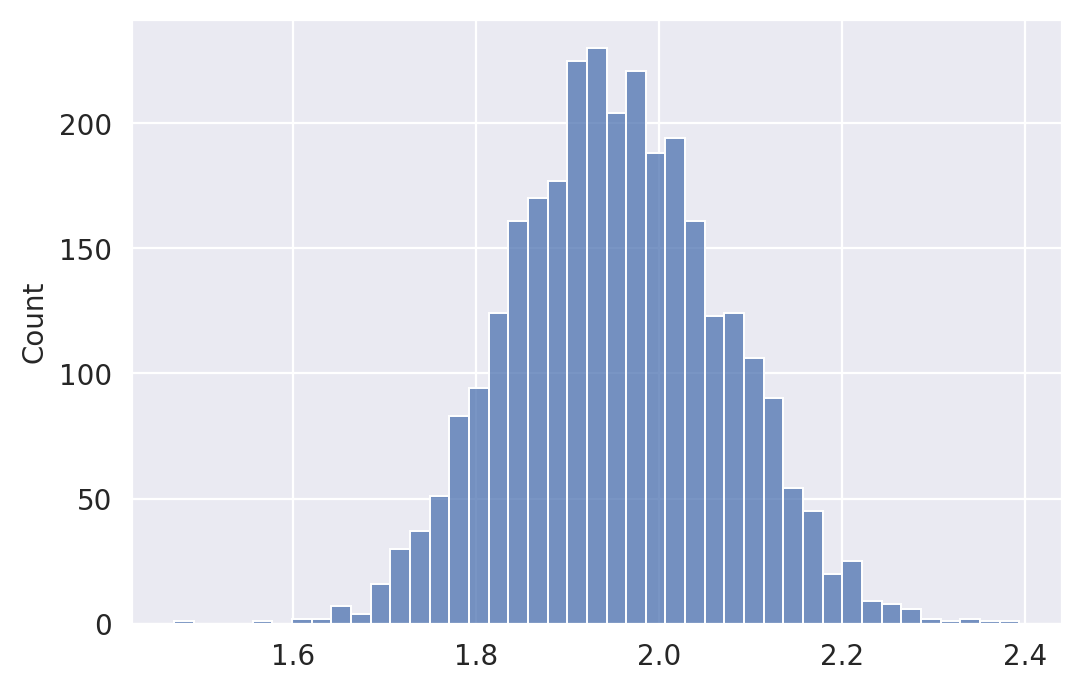

In [ ]:
sns.histplot(means_diff)

Відсікаємо 2.5% з кожного хвоста, все, що лишилося в діапазоні - СІ95

В таких межах лежить різниця між середніми в популяції

Не захоплює 0 - є статистично значуща різниця між середніми

In [ ]:
CI = np.percentile(means_diff, 2.5), np.percentile(means_diff, 97.5)
CI

(1.7331029654766739, 2.1781292957680063)

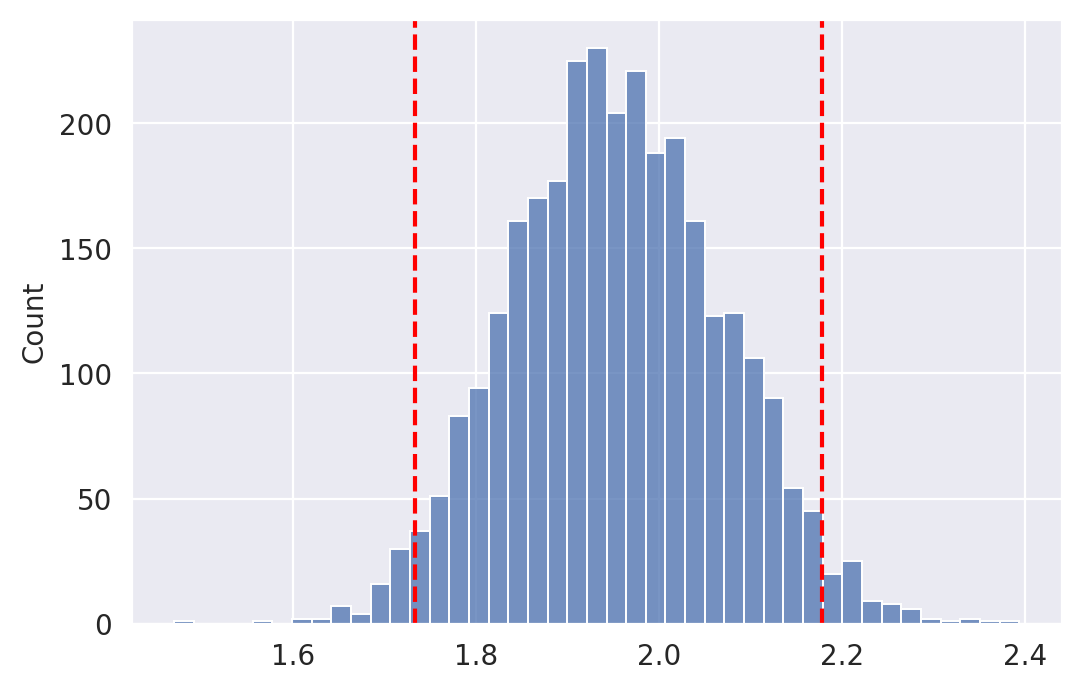

In [ ]:
sns.histplot(means_diff)
plt.axvline(CI[0], color='red', linestyle='--')
plt.axvline(CI[1], color='red', linestyle='--')

# Correlation

Correlation - linear relationship between two variables

Сorrelation doesn`t mean causation

Може бути третя змінна яку не включили і вона могла повпливати

Варіація - на скільки змінні далеко/близько розташовані від середнього

n-1 - поправка Бесселя - зменшення помилки


$$variance = \frac{\sum{(x -\bar{x}})^2}{n-1}$$

In [ ]:
adverts = np.array([5, 4, 4, 6, 8])
packets = np.array([8, 9, 10, 13, 15])

In [ ]:
adverts.mean()

5.4

pd.df.std assumes ddof = 1 by default when numpy.std assumes ddof = 0 by default

In [ ]:
adverts.std(ddof=1)

1.6733200530681511

In [ ]:
adverts.var(ddof=1)

2.8

Стандартне відхилення

In [ ]:
np.sqrt(2.8)

1.6733200530681511

In [ ]:
np.cov(adverts, packets)

array([[2.8 , 4.25],
       [4.25, 8.5 ]])

Calculating covariance for detecting if two variances are related to each other

Positive - one variable daviates from the mean, other - in same direction

Negative - other in opposite direction

Covariance is not standartised value - не можемо порівнювати різні коваріації між собою

For standartisation - standart deviations of both variances

Standardize correlation is a correlation coefficient

$$ cov(x,y) = \frac{\sum{(x_i -\bar{x})(y_i-\bar{y})}}{N-1}$$

Коефіцієнт кореляції Пірсона - для стандартизації стандартні відхилення двох виборок

$$ r = \frac{cov_{xy}}{{s_x}{s_y}} = \frac{\sum{(x_i -\bar{x})(y_i-\bar{y})}}{(N-1){s_x}{s_y}}$$

n-1 включена за допомогою ddof=1

In [ ]:
4.25 / (np.std(adverts, ddof=1) * np.std(packets, ddof=1))

0.871165065546462

In [ ]:
df = pd.DataFrame({'a':adverts, 'p':packets})
df

,a,p
0,5,8
1,4,9
2,4,10
3,6,13
4,8,15


In [ ]:
df.a

0    5
1    4
2    4
3    6
4    8
Name: a, dtype: int64

In [ ]:
df['a'].std()

1.6733200530681511

## Pearson`s correlation coeficient

CI95 захоплює нуль - немає сили зв'язку, статистично незначимий результат - але r вказує на сильну позитивну кореляцію - мала вибірка

BF = effect size

In [ ]:
pg.corr(df['a'], df['p'])

,n,r,CI95%,p-val,BF10,power
pearson,5,0.871165,"[-0.05, 0.99]",0.054426,2.308,0.544139


Covariance - a crude measure of the relationship between variables

If we standartize - getting Pearson's correlation coeficient (r)

Correlation coeficient has to lie between -1 and +1

+1 - perfect positive correlation

-1 - perfect negative correlation

0 - no correlation at all

Measure of size of an effect:
  - +-0.1 - small effect
  - +-0.3 - medium effect
  - +-0.5 - large effect

Correlation coeficient are effect size - can interpret results without p-value

Кореляція характеризує лінійну залежність, силу зв'язку між двома змінними та характеризується силою зв'язку та напрямком - величина ефекту - не потребує р

r^2 - coeficient of determination - Pearson`s correlation coeficient^2 - the amount of variances that can explain another variances

Кількість дисперсій яку одна величина розділяє з іншою - більше дисперсій - більше схожості


In [ ]:
0.87 ** 2

0.7569

## Spearman`s correlation coeficient

rs

Pearson - on real data, when Spearman - on ranges

Дані ранжуються - коефіцієнт Пірсона на ранжованих даних

Non parametric

Relationships can be described as monotonic function:
- the value of one variable increases - increases the value of other variable
- the value of one variable increases - decreases the value of other variable

Pearson - linear, Spearman - monotonic

Anscombe's quartet - comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed - **before analуze visualize**


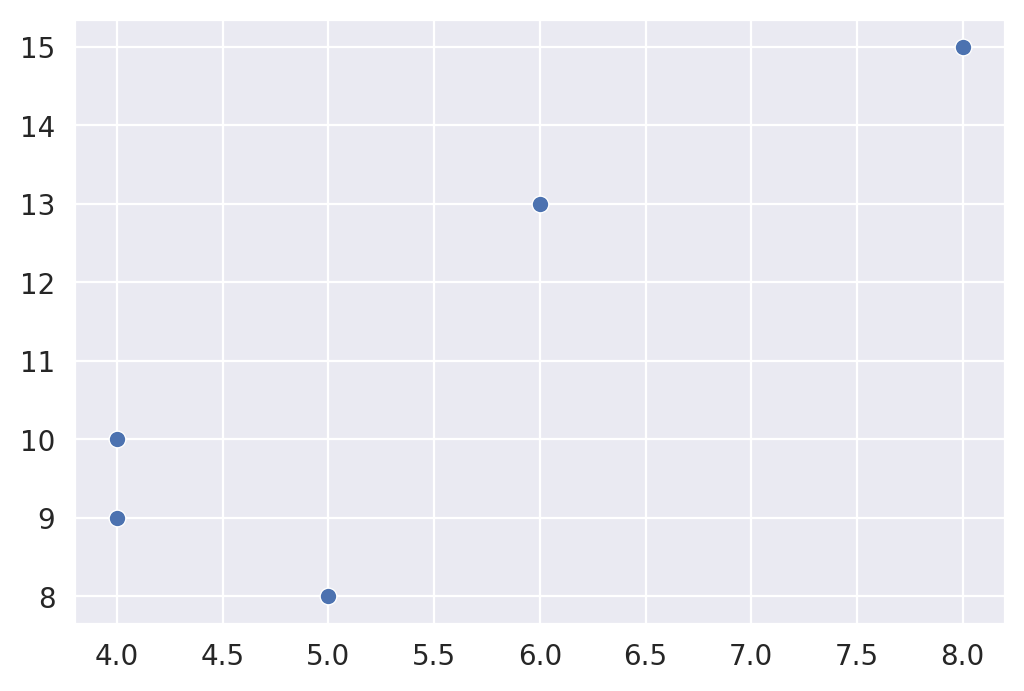

In [ ]:
sns.scatterplot(x=adverts, y=packets)

In [ ]:
pg.corr(df['a'], df['p'], method='spearman')

,n,r,CI95%,p-val,power
spearman,5,0.666886,"[-0.52, 0.98]",0.218894,0.249341


## Kendall's tau correlation

When sample size is small (approx. 10 observations)

Non parametric

In [ ]:
pg.corr(df['a'], df['p'], method='kendall')

,n,r,CI95%,p-val,power
kendall,5,0.527046,"[-0.66, 0.96]",0.206507,0.15759


## Correlation matrix

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
pg.rcorr(df)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,-,,***,***
sepal.width,-0.118,-,***,***
petal.length,0.872,-0.428,-,***
petal.width,0.818,-0.366,0.963,-


'* - statistical valuable difference
- '* - < 0.5
- '** - < 0.05
- '*** - < 0.01

If don`t need statistical value - cor

In [ ]:
cor = df.corr()
cor

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


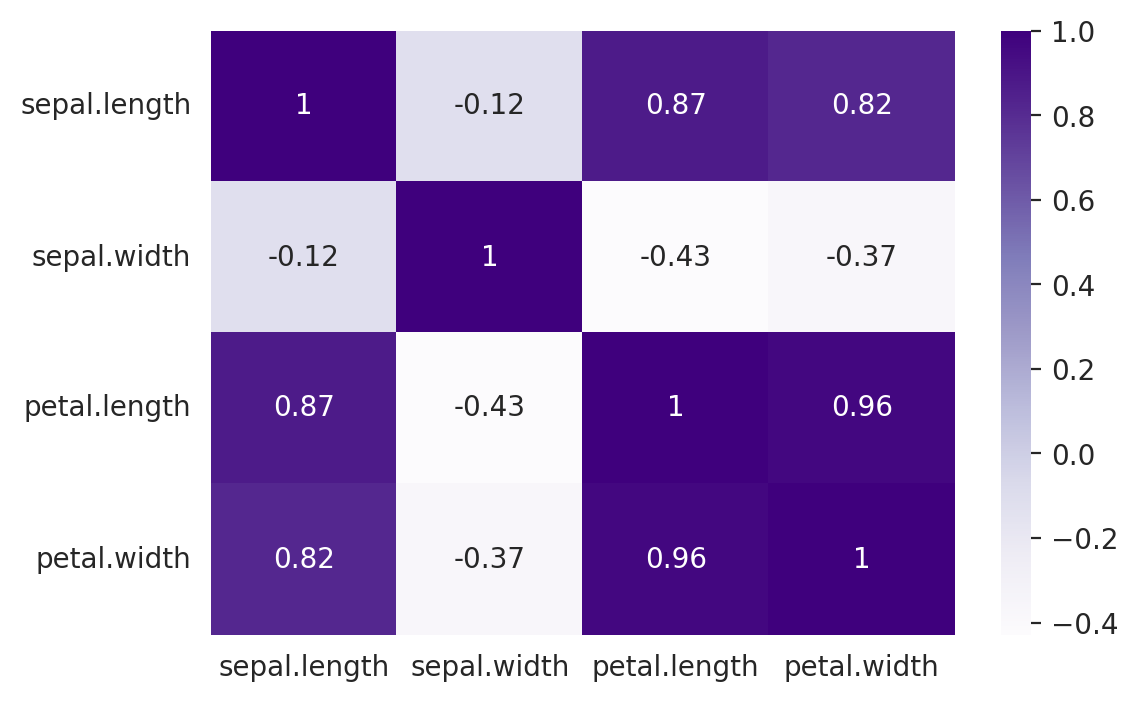

In [ ]:
sns.heatmap(cor, annot=True, cmap='Purples')

## Correlation between categorical valuables

Cramer's V

Як пов'язані дві категоріальні змінні

The output between 0 and 1
- 0 - no association
- 1 - full association

Symmetric - some data can be lost - insensitive to swapping x and y

Знаючи х не знаємо у, але знаючи у знаємо і х

Theil's U - uncertainty coefficient - asymmetric measure of association between categorical features - given the value x how many possible states does y have and how often they occur

Correlation ratio - measuring association between continuous and categorical feature - given a continuous number how well can we know to which category it belongs to

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stat data/mushroom_csv (1).csv')
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l,p


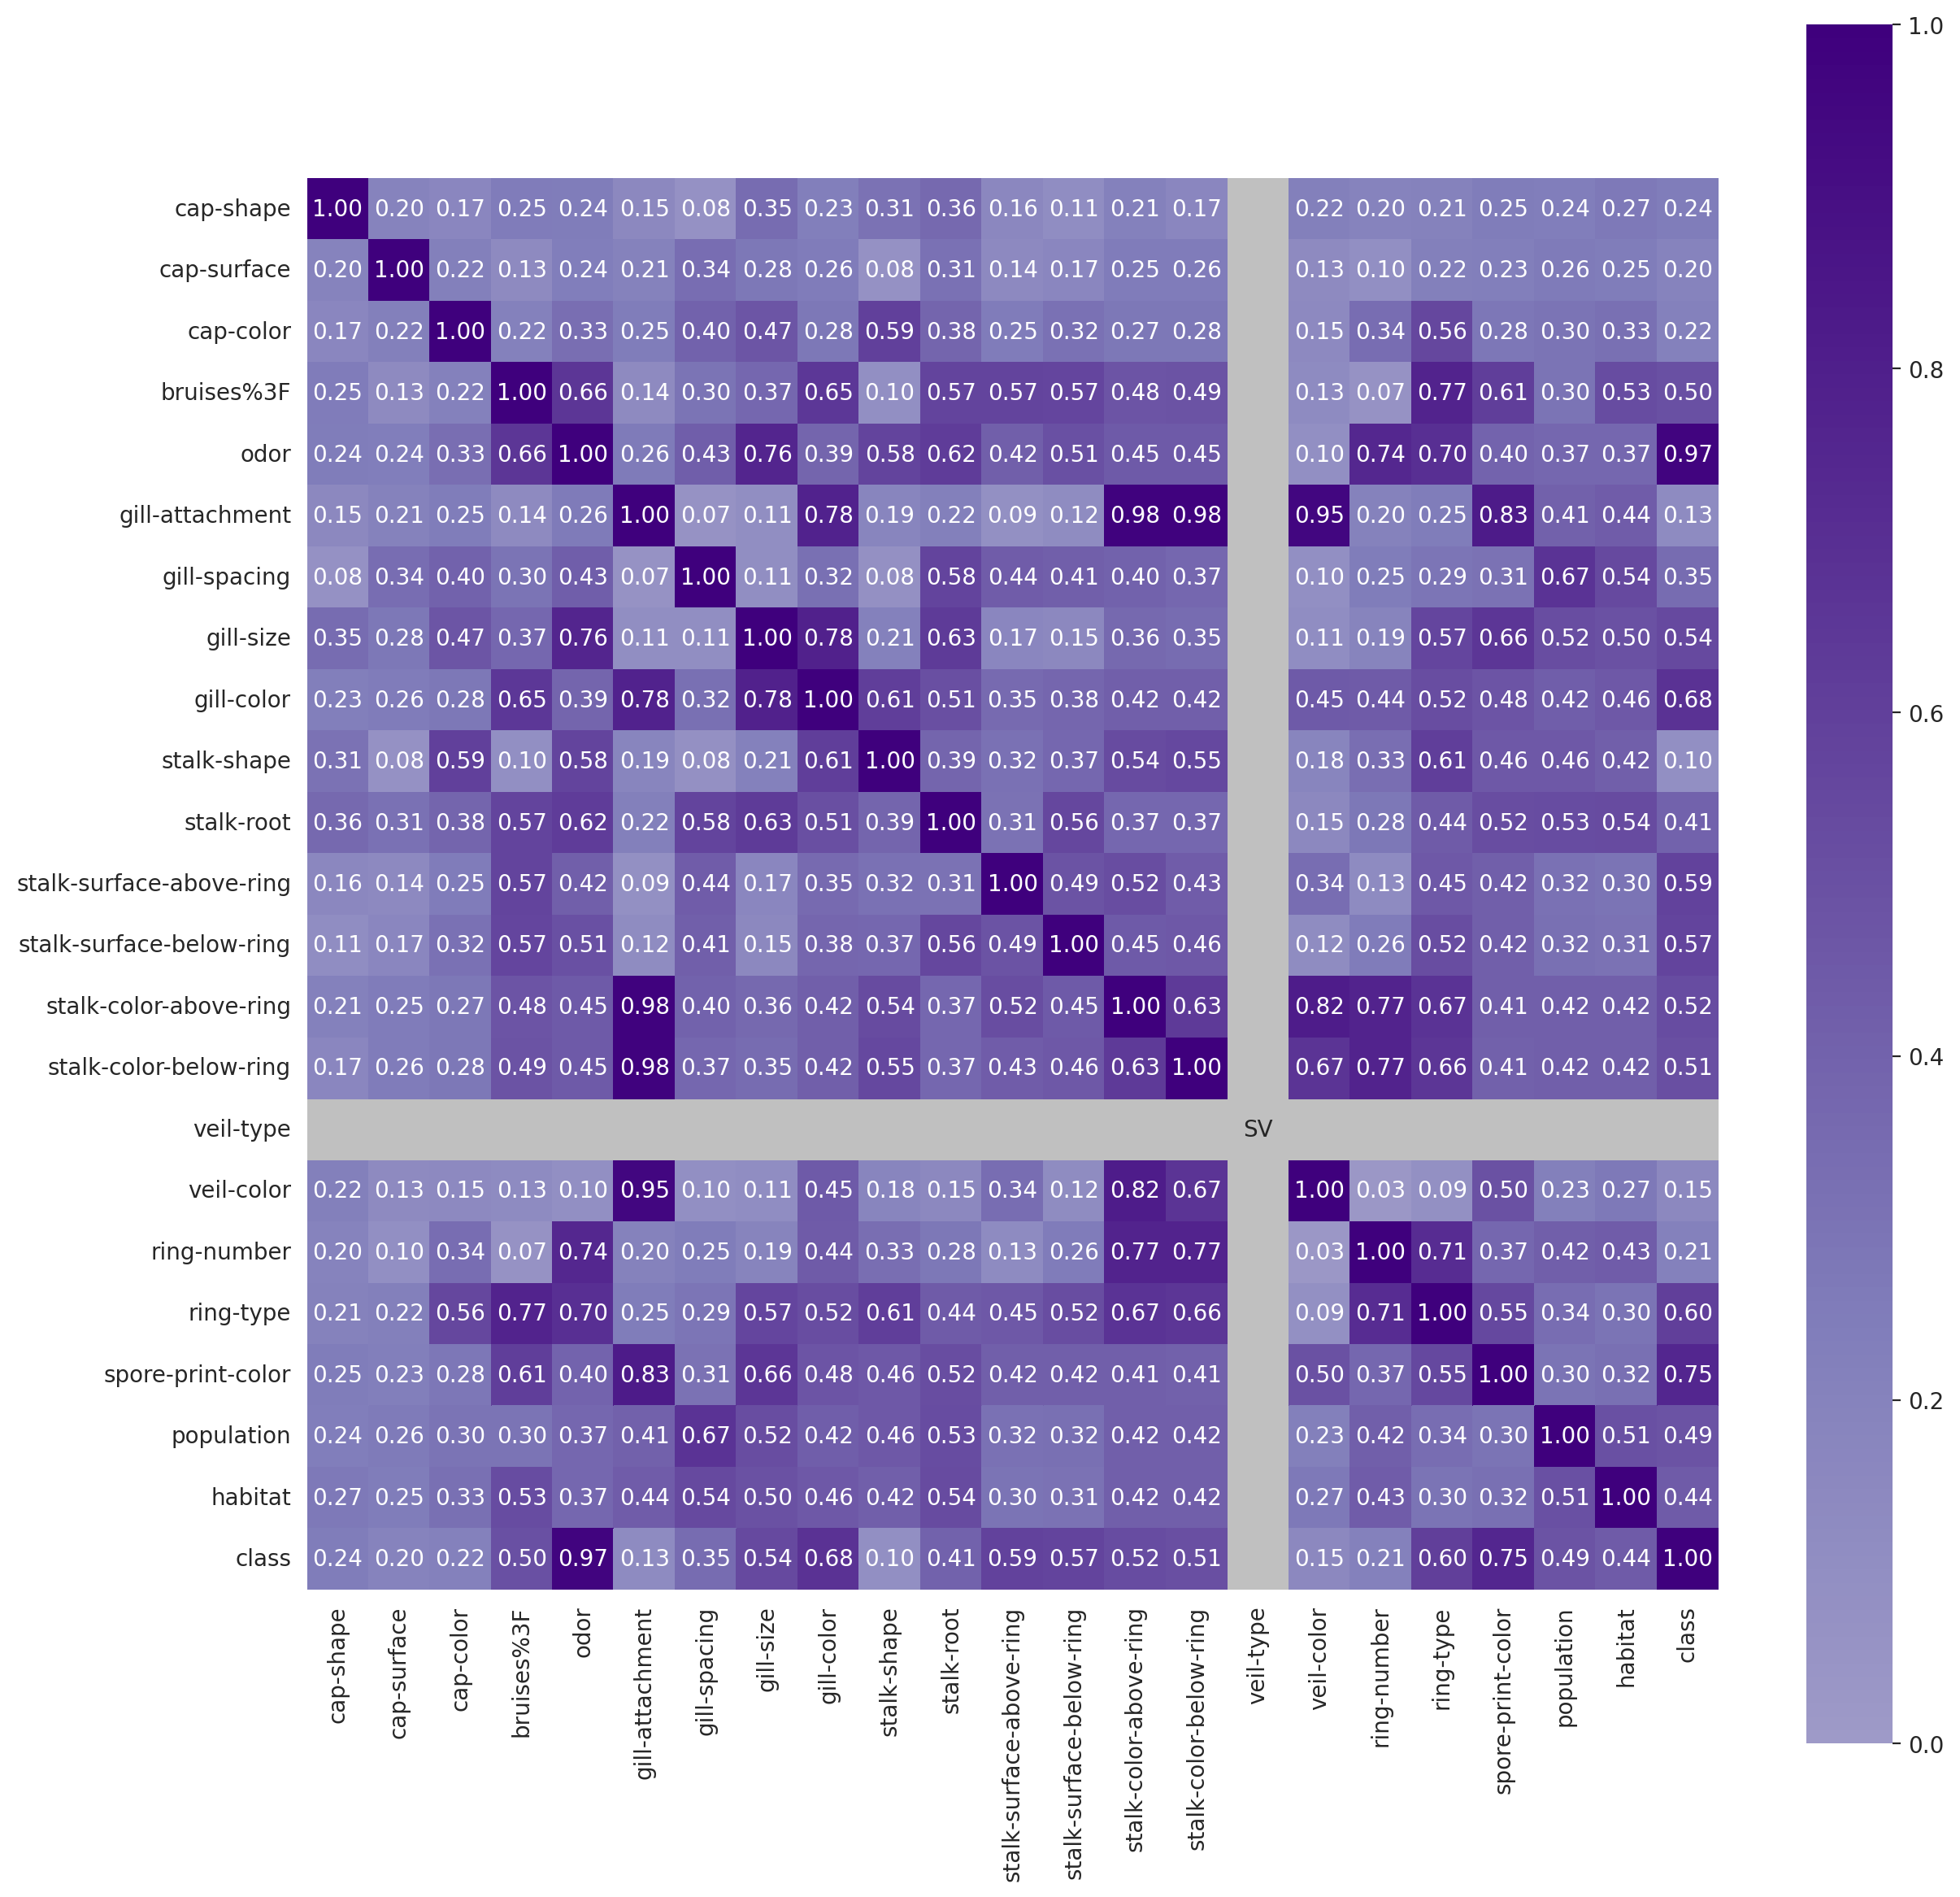

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb4c55d0850>,
 'corr':                           cap-shape  cap-surface  ...   habitat     class
 cap-shape                  1.000000     0.202242  ...  0.269842  0.244330
 cap-surface                0.202242     1.000000  ...  0.249577  0.195997
 cap-color                  0.168221     0.222841  ...  0.325199  0.215889
 bruises%3F                 0.254415     0.133004  ...  0.530257  0.501188
 odor                       0.243577     0.236416  ...  0.368861  0.970558
 gill-attachment            0.152989     0.209977  ...  0.435707  0.127951
 gill-spacing               0.077849     0.337696  ...  0.541961  0.347897
 gill-size                  0.345956     0.276765  ...  0.498616  0.539677
 gill-color                 0.232274     0.255023  ...  0.457212  0.679877
 stalk-shape                0.306119     0.076395  ...  0.417101  0.101170
 stalk-root                 0.359388     0.313927  ...  0.536186  0.406224
 stalk-surface-above-ring 

In [ ]:
associations(df, figsize=(14,14), cmap='Purples')

##Distance correlation

Distance correlation - two many relationships that aren`t linear - measure of association strenght between non-linear random variables

Менша потужність для лінійних залежностей, вища для нелінійних

In [ ]:
a = [1, 2, 3, 4, 5]
b = [1, 2, 9, 4, 4]
dcor, pval = distance_corr(a, b)

dcor, pval

(0.7626762424168667, 0.321)

##Hometask 4

Perform correlation analysis and find out if ‘tip’ is correlated with ‘total_bill’, ‘gender’ and day of the week. Use different correlation techniques and describe your findings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stat data/data.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


First of all - visualizing data

Relation between tip and total bill

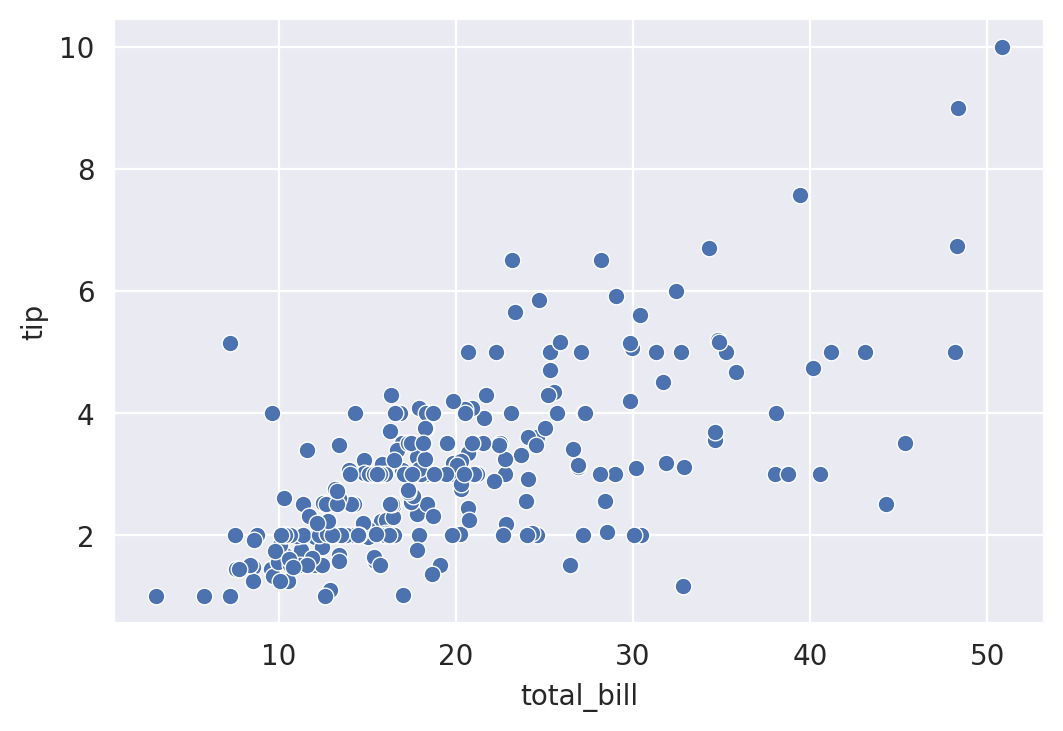

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip')

Relation between tip and day of week. + gender

### Tip & total bill

We need to perform correlation analysis and find out if tip is correlated with total bill. Values are continuous. As we have more than 10 values, for correlation analysis we can use Pearson's method or Spearman's

Performing Pearson's correlation analysis

In [ ]:
pg.corr(df['tip'], df['total_bill'])

,n,r,CI95%,p-val,BF10,power
pearson,244,0.675734,"[0.6, 0.74]",6.692471e-34,4.952e+30,1.0


According to results of Pearson's correlation analysis, there is large (r = 0.68, r > 0.5) possitive correlation between tip and total bill. (CI aren`t include 0 ([0.6, 0.74]) and p-value < 0.05, so our results are statistically valuable).

After visualizing our data by  scatterplot I cannot definitely say that relations between tip and total bill can be described as linear function. So, additionaly performing Spearman's correlation analysis.

In [ ]:
pg.corr(df['tip'], df['total_bill'], method='spearman')

,n,r,CI95%,p-val,power
spearman,244,0.678968,"[0.6, 0.74]",2.501158e-34,1.0


According to results of Spearman's correlation analysis, there is large (rs = 0.68, rs > 0.5) possitive correlation between tip and total bill. (CI aren`t include 0 ([0.6, 0.74]) and p-value < 0.05, so our results are statistically valuable).


### Tip & gender / tip & day

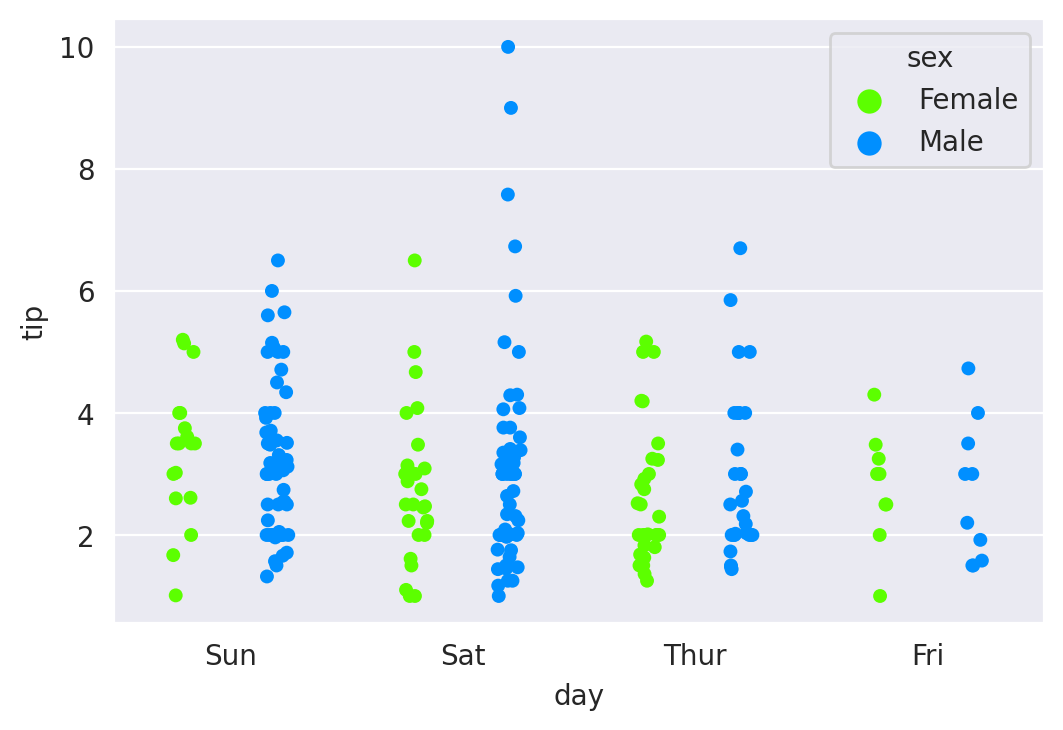

In [ ]:
sns.stripplot(data=df, x="day", y="tip", hue='sex', dodge=True, palette='gist_rainbow')

We need to perform correlation analysis and find out if tip is correlated with gender and day. Gender and day a categorical features, when tip is continuous. For this we can use Cramer's V coefficient.

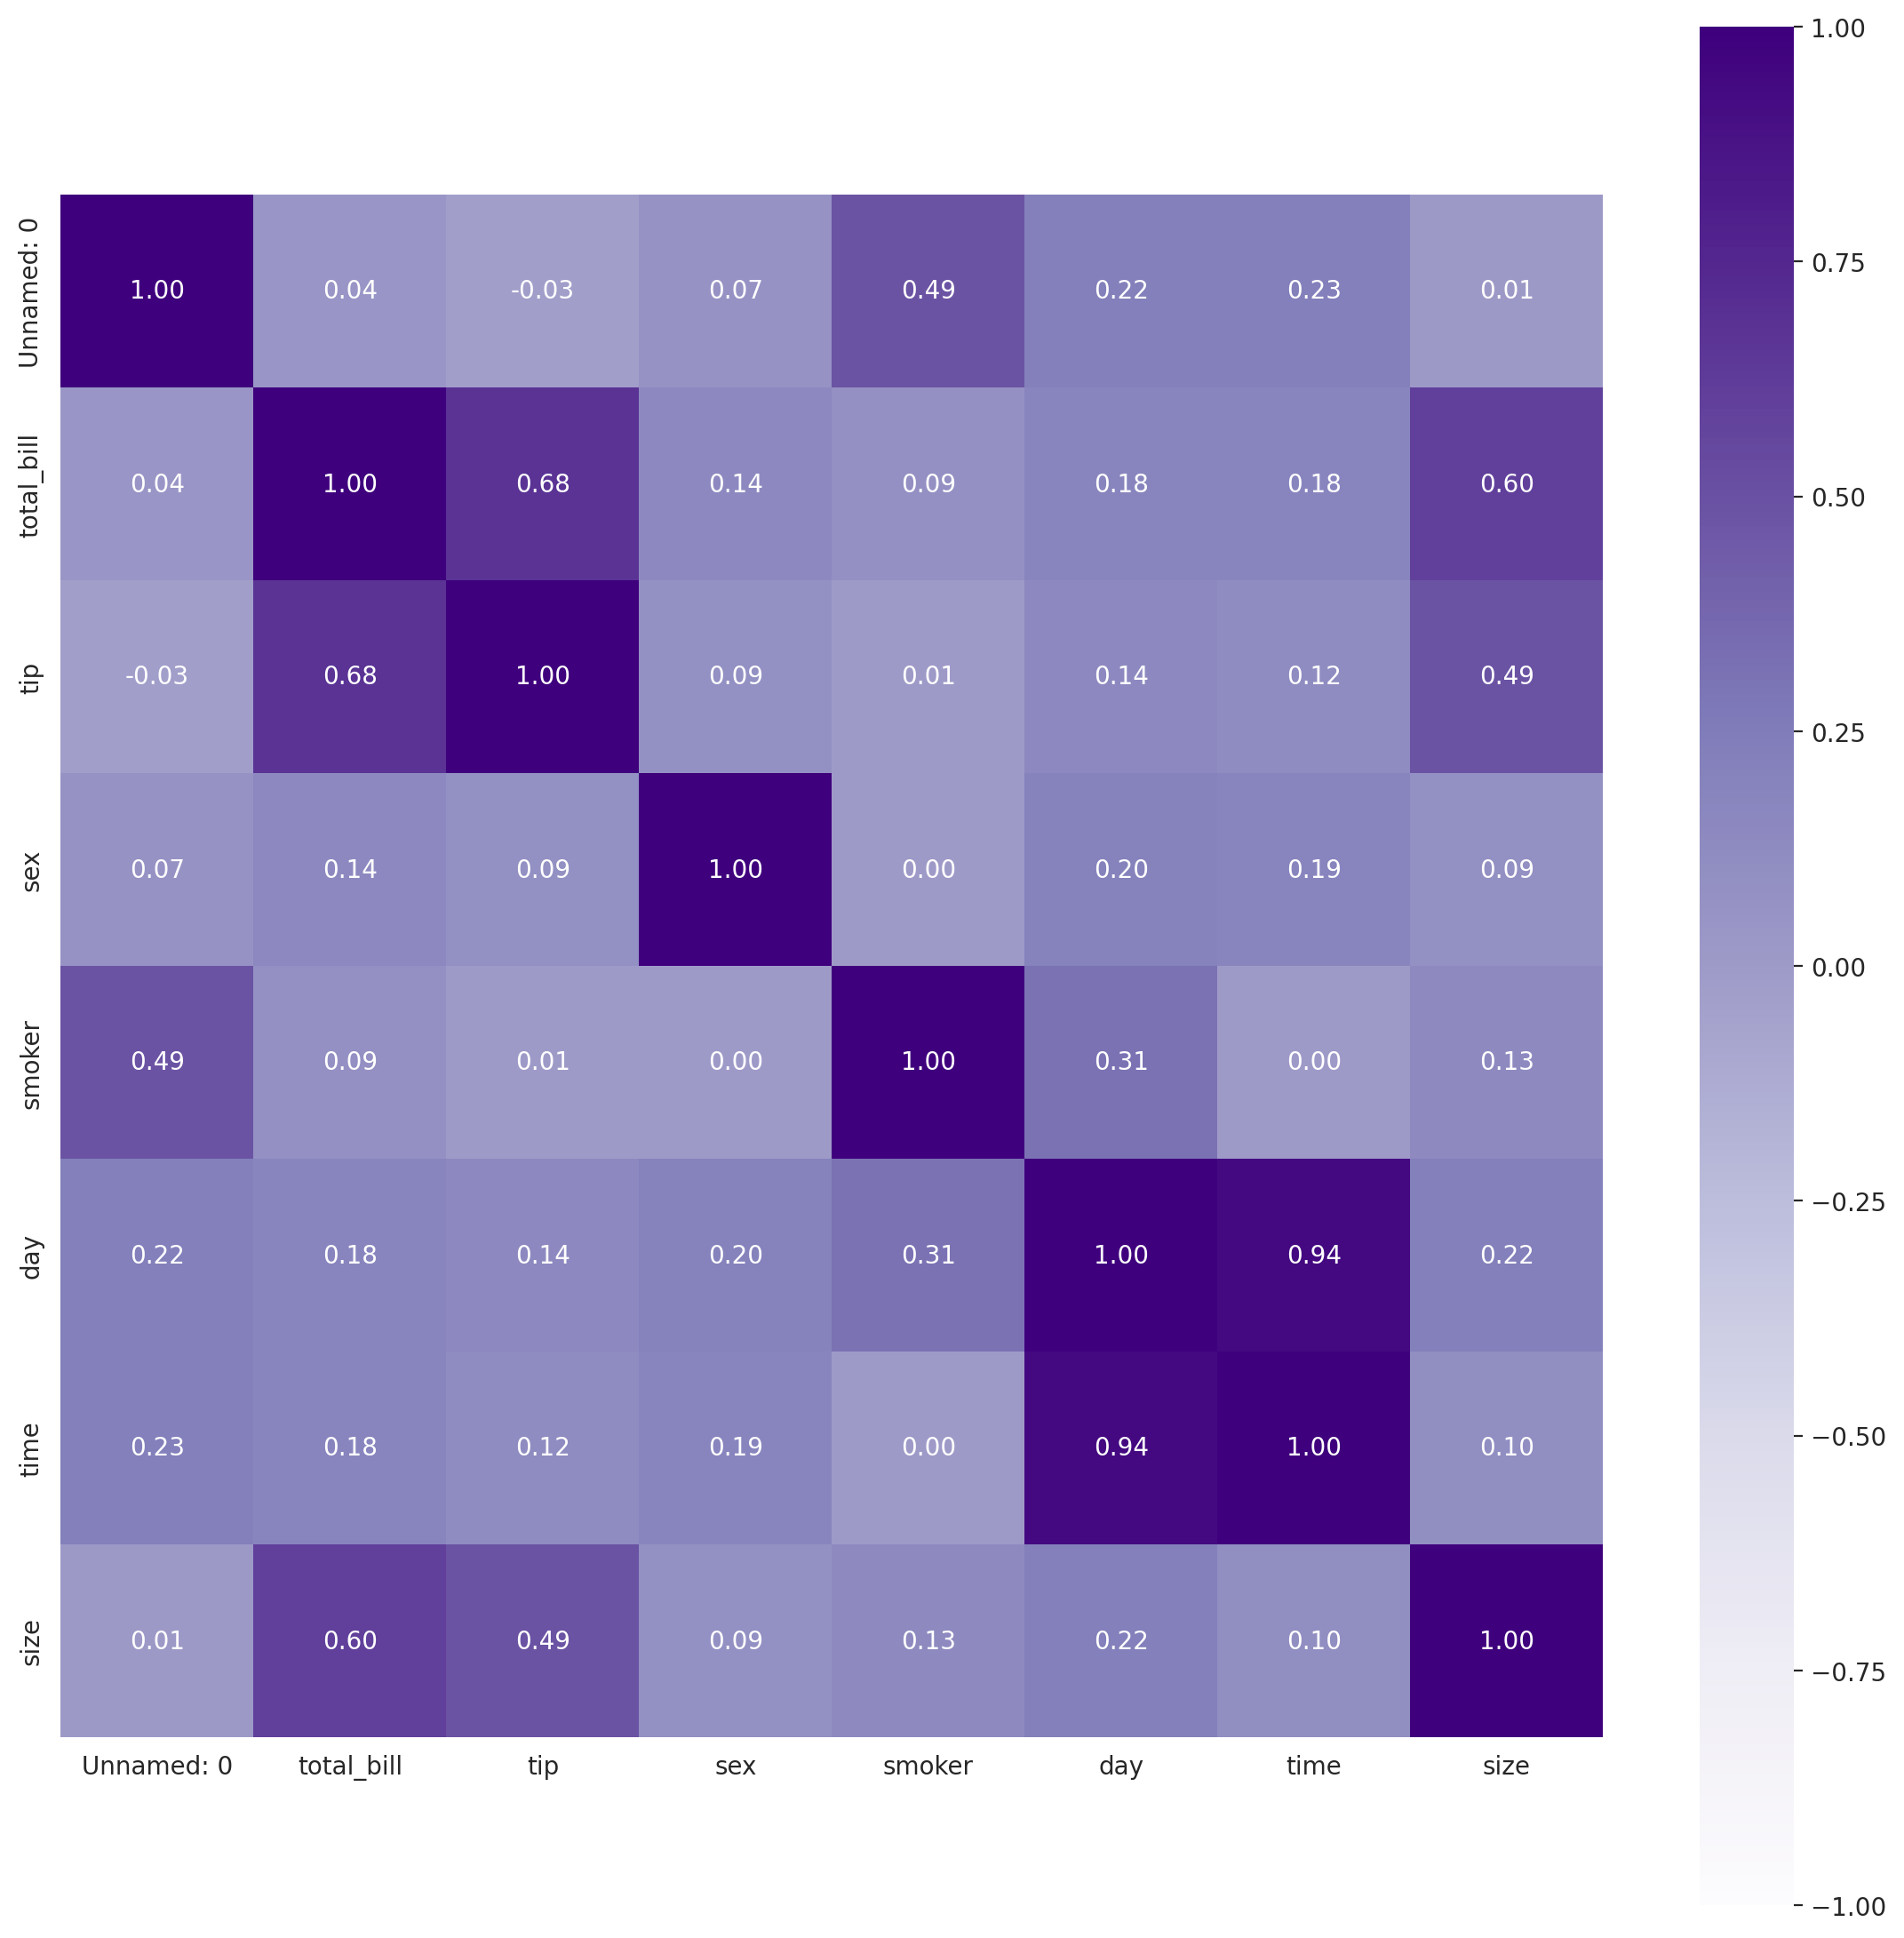

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb4c502e1d0>,
 'corr':             Unnamed: 0  total_bill       tip  ...       day      time      size
 Unnamed: 0    1.000000    0.044526 -0.026709  ...  0.219875  0.225421  0.008061
 total_bill    0.044526    1.000000  0.675734  ...  0.182857  0.183118  0.598315
 tip          -0.026709    0.675734  1.000000  ...  0.143096  0.121629  0.489299
 sex           0.069546    0.144877  0.088862  ...  0.204977  0.185257  0.086195
 smoker        0.486707    0.085721  0.005929  ...  0.306146  0.000000  0.133178
 day           0.219875    0.182857  0.143096  ...  1.000000  0.938662  0.222087
 time          0.225421    0.183118  0.121629  ...  0.938662  1.000000  0.103411
 size          0.008061    0.598315  0.489299  ...  0.222087  0.103411  1.000000
 
 [8 rows x 8 columns]}

In [ ]:
associations(df, figsize=(14,14), cmap='Purples')

According to results of Kramer's V correlation analysis, there is small (r = 0.09 and r = 0.14) correlation between groups tip & gender and tip & day.

#Pearsons Chi-square

Непараметричний

Тест на незалежність / відсутність асоціацій

Лише категоріальні змінні

$$ chi-square = \frac{(O - E)^{2}}{E} $$

where: O - observed frequency, E - expected frequency

Expected - якби різниці не було

Таблиці спряженості

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stat data/chi_square_data.csv")
df

,Type,Group
0,apoptosis,case
1,apoptosis,case
2,apoptosis,case
3,apoptosis,case
4,apoptosis,case
...,...,...
195,necrosis,control
196,necrosis,control
197,necrosis,control
198,necrosis,control


In [ ]:
pd.crosstab(df['Type'], df['Group'])

Group,case,control
Type,,
apoptosis,29,71
necrosis,16,84


In [ ]:
E, O, test = pg.chi2_independence(data=df, x='Type', y='Group', correction=False)

In [ ]:
E

Group,case,control
Type,,
apoptosis,22.5,77.5
necrosis,22.5,77.5


In [ ]:
O

Group,case,control
Type,,
apoptosis,29,71
necrosis,16,84


In [ ]:
test

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4.845878,1.0,0.027712,0.155658,0.595382
1,cressie-read,0.666667,4.858031,1.0,0.027518,0.155853,0.596451
2,log-likelihood,0.000000,4.901224,1.0,0.026838,0.156544,0.600231
3,freeman-tukey,-0.500000,4.950764,1.0,0.026079,0.157333,0.604535
4,mod-log-likelihood,-1.000000,5.015748,1.0,0.025118,0.158363,0.610130
5,neyman,-2.000000,5.195568,1.0,0.022645,0.161176,0.625305


Cramer's V - величина ефекту - сила зв'язку між категоріальними змінними
- < 0.02 - слабий
- < 0.06 - середній
- 0.06 > - сильний

Статистично значимо асоційовані, проте сила зв'язку слабка

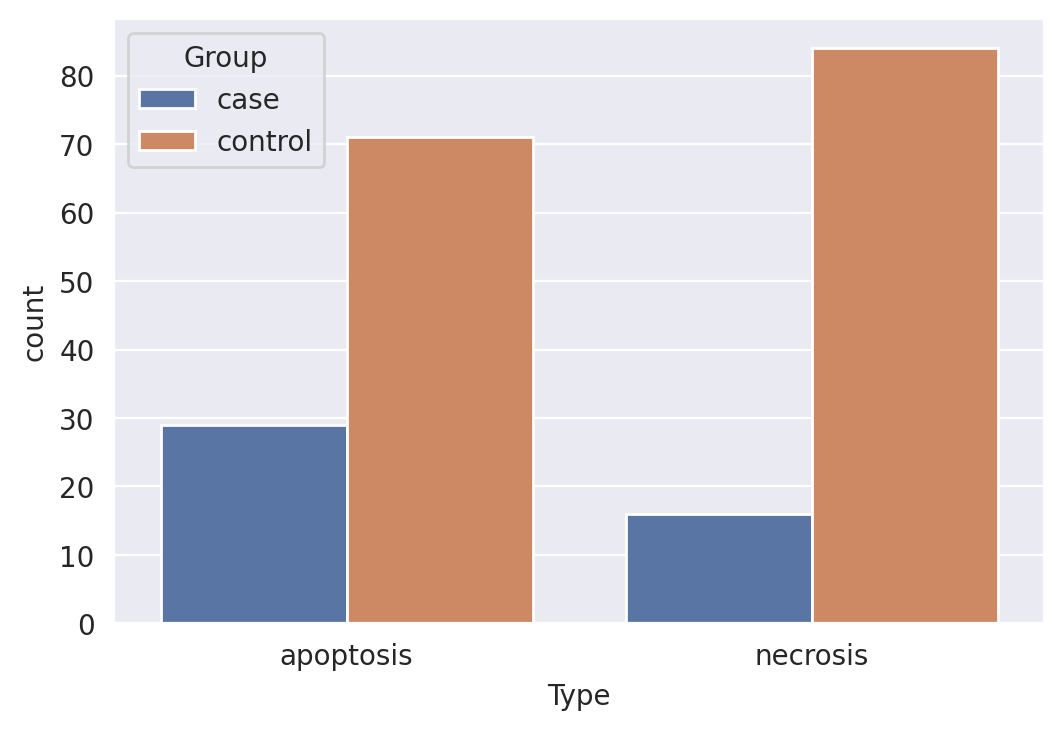

In [ ]:
sns.countplot(x=df['Type'], hue=df['Group'])

## Hometask 5

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stat data/chi_square_data2.csv")
df

,Genotype,Group
0,AA,case
1,AA,case
2,AA,case
3,AA,case
4,AA,case
...,...,...
170,aa,control
171,aa,control
172,aa,control
173,aa,control


Creating contingency table

In [ ]:
pd.crosstab(df['Genotype'], df['Group'])

Group,case,control
Genotype,,
AA,32,15
Aa,34,20
aa,14,60


In [ ]:
E, O, test = pg.chi2_independence(data=df, x='Genotype', y='Group', correction=False)

Calculating expected values

In [ ]:
E

Group,case,control
Genotype,,
AA,21.485714,25.514286
Aa,24.685714,29.314286
aa,33.828571,40.171429


Performing chi-square independence test

In [ ]:
test

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,37.361942,2.0,7.708278e-09,0.462057,0.999925
1,cressie-read,0.666667,37.840100,2.0,6.069132e-09,0.465004,0.999936
2,log-likelihood,0.000000,39.473798,2.0,2.681475e-09,0.474936,0.999962
3,freeman-tukey,-0.500000,41.396834,2.0,1.025160e-09,0.486367,0.999980
4,mod-log-likelihood,-1.000000,44.056630,2.0,2.711592e-10,0.501749,0.999992
5,neyman,-2.000000,52.350751,2.0,4.287251e-12,0.546943,1.000000


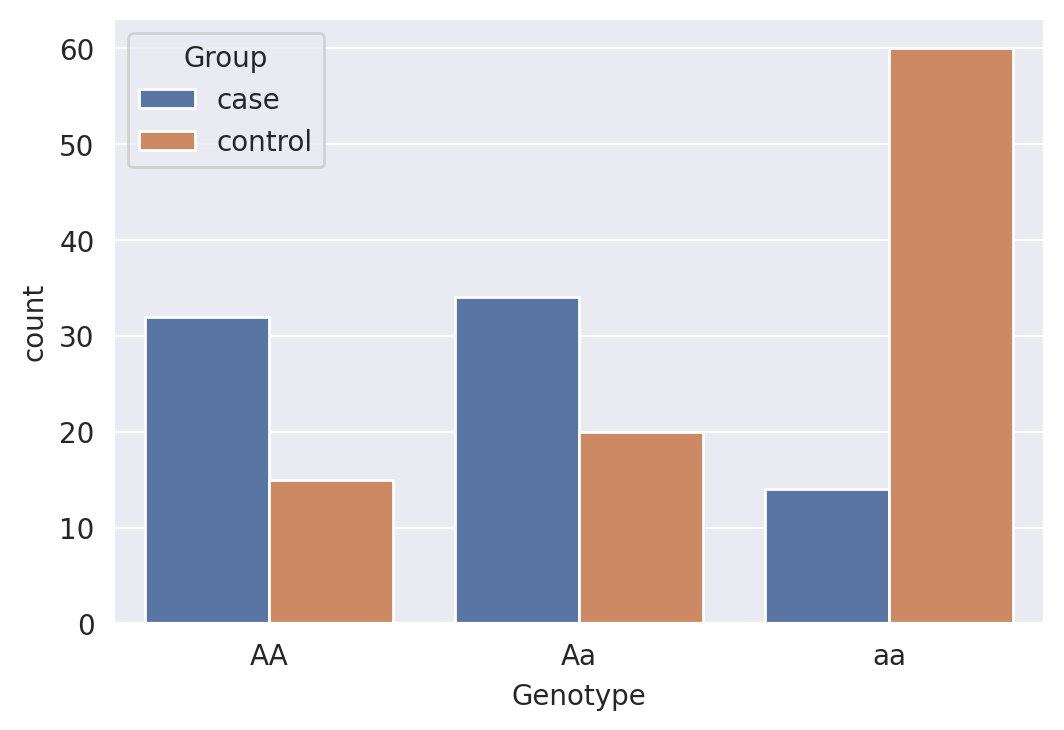

In [ ]:
sns.countplot(x=df['Genotype'], hue=df['Group'])

Statistical analysis was performed using Python's statistical pack (https://pingouin-stats.org, ver. 0.4). Chi-square method was used to analyze two categorical variables - Group, Genotype. Results were considered statistically significant at p < 0.05.

Results: We have found a statistically significant difference (p < 0.05) between Group and Genotype (chi-square = 37.362, df = 2).